###  Machine Learning-Based Prediction of Peak Water Levels and Flood Occurrence of Bangladesh
#### Md. Asifur Rahman Asif

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor 

from sklearn.metrics import mean_squared_error, r2_score  

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


#### Load data

In [2]:
import pandas as pd

df = pd.read_excel("Water Level Data.xlsx")

display(df.head(10))

,Year,River,Station,Basin,Recorded_Maximum,Danger_Level,Peak_of_the_year,Days_above_Danger_level
0,2010,Dharla,Kurigram,Brahmaputra,27.66,26.50,26.83,4
1,2010,Teesta,Dalia,Brahmaputra,52.97,52.25,52.65,9
2,2010,Teesta,Kaunias,Brahmaputra,30.52,30.00,29.44,0
3,2010,Brahmaputra,Noonkhawa,Brahmaputra,28.10,27.25,26.36,0
4,2010,Brahmaputra,Chilmari,Brahmaputra,25.06,24.00,24.28,14
5,2010,Jamuna,Bahadurabad,Brahmaputra,20.62,19.50,19.8,22
6,2010,Jamuna,Serajganj,Brahmaputra,15.12,13.75,13.83,15
7,2010,Jamuna,Aricha,Brahmaputra,10.76,9.14,9.6,10
8,2010,Old Br.putra,Jamalpur,Brahmaputra,18.00,17.00,16.17,0
9,2010,Old Br.putra,Mymensingh,Brahmaputra,14.02,12.50,10.84,0


In [3]:
import pandas as pd

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

print(df)

     Year        River    Station               Basin  Recorded_Maximum  \
0    2010       Dharla   Kurigram         Brahmaputra             27.66   
1    2010       Teesta      Dalia         Brahmaputra             52.97   
2    2010       Teesta    Kaunias         Brahmaputra             30.52   
3    2010  Brahmaputra  Noonkhawa         Brahmaputra             28.10   
4    2010  Brahmaputra   Chilmari         Brahmaputra             25.06   
..    ...          ...        ...                 ...               ...   
268  2015        Sangu  Bandarban  South Eastern Hill             20.38   
269  2015        Sangu   Dohazari  South Eastern Hill              9.05   
270  2015   Matamuhuri       Lama  South Eastern Hill             15.45   
271  2015   Matamuhuri   Chiringa  South Eastern Hill              6.83   
272  2015         Feni    Ramgarh  South Eastern Hill             21.41   

     Danger_Level Peak_of_the_year Days_above_Danger_level  
0           26.50            26.83    

#### Data Preprocessing

##### Checking Nan Values

In [4]:
df.isnull().sum()

Year                       0
River                      0
Station                    0
Basin                      0
Recorded_Maximum           0
Danger_Level               0
Peak_of_the_year           0
Days_above_Danger_level    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     273 non-null    int64  
 1   River                    273 non-null    object 
 2   Station                  273 non-null    object 
 3   Basin                    273 non-null    object 
 4   Recorded_Maximum         273 non-null    float64
 5   Danger_Level             273 non-null    float64
 6   Peak_of_the_year         273 non-null    object 
 7   Days_above_Danger_level  273 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 17.2+ KB


In [6]:
numeric_columns = ['Peak_of_the_year', 'Days_above_Danger_level']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     273 non-null    int64  
 1   River                    273 non-null    object 
 2   Station                  273 non-null    object 
 3   Basin                    273 non-null    object 
 4   Recorded_Maximum         273 non-null    float64
 5   Danger_Level             273 non-null    float64
 6   Peak_of_the_year         272 non-null    float64
 7   Days_above_Danger_level  157 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 17.2+ KB


In [8]:
df.columns

Index(['Year', 'River', 'Station', 'Basin', 'Recorded_Maximum', 'Danger_Level',
       'Peak_of_the_year', 'Days_above_Danger_level'],
      dtype='object')

In [9]:
df.isnull().sum()

Year                         0
River                        0
Station                      0
Basin                        0
Recorded_Maximum             0
Danger_Level                 0
Peak_of_the_year             1
Days_above_Danger_level    116
dtype: int64

##### Filling the Nan values with median

In [10]:
df['Peak_of_the_year'].fillna(df['Peak_of_the_year'].median(), inplace=True)
df['Days_above_Danger_level'].fillna(df['Days_above_Danger_level'].median(), inplace=True)

display(df.head(10))

,Year,River,Station,Basin,Recorded_Maximum,Danger_Level,Peak_of_the_year,Days_above_Danger_level
0,2010,Dharla,Kurigram,Brahmaputra,27.66,26.50,26.83,4.0
1,2010,Teesta,Dalia,Brahmaputra,52.97,52.25,52.65,9.0
2,2010,Teesta,Kaunias,Brahmaputra,30.52,30.00,29.44,0.0
3,2010,Brahmaputra,Noonkhawa,Brahmaputra,28.10,27.25,26.36,0.0
4,2010,Brahmaputra,Chilmari,Brahmaputra,25.06,24.00,24.28,14.0
5,2010,Jamuna,Bahadurabad,Brahmaputra,20.62,19.50,19.80,22.0
6,2010,Jamuna,Serajganj,Brahmaputra,15.12,13.75,13.83,15.0
7,2010,Jamuna,Aricha,Brahmaputra,10.76,9.14,9.60,10.0
8,2010,Old Br.putra,Jamalpur,Brahmaputra,18.00,17.00,16.17,0.0
9,2010,Old Br.putra,Mymensingh,Brahmaputra,14.02,12.50,10.84,0.0


In [11]:
df.isnull().sum()

Year                       0
River                      0
Station                    0
Basin                      0
Recorded_Maximum           0
Danger_Level               0
Peak_of_the_year           0
Days_above_Danger_level    0
dtype: int64

In [12]:
df.describe()

,Year,Recorded_Maximum,Danger_Level,Peak_of_the_year,Days_above_Danger_level
count,273.000000,273.000000,273.000000,273.000000,273.000000
mean,2012.527473,16.251429,14.488645,14.532143,12.166667
std,1.699961,9.031647,9.298475,9.229491,17.358214
min,2010.000000,5.590000,4.110000,3.610000,0.000000
25%,2011.000000,9.480000,8.250000,8.360000,7.000000
50%,2013.000000,14.600000,12.500000,12.085000,8.000000
75%,2014.000000,20.420000,17.370000,17.470000,10.000000
max,2015.000000,52.970000,52.400000,52.850000,121.000000


In [13]:
df['River'].value_counts()

Surma           18
Jamuna          18
Kushiyara       18
Ganges          18
Brahmaputra     12
Old Br.putra    12
Matamuhuri      12
Sangu           12
Halda           12
Manu            12
Teesta          12
Padma           12
Gorai           11
Upper Meghna     6
Muhuri           6
Gumti            6
Feni             6
Khowai           6
Dharla           6
Jariajanjail     6
Arialkhan        6
Punarbhaba       6
Tongi Khal       6
Turag            6
Lakhya           6
Buriganga        6
Ghagot           5
Kobodak          5
Jamuneswari      4
Kaliganga        2
Name: River, dtype: int64

In [14]:
df['Station'] = df['Station'].replace('Habigonj', 'Habiganj')

print(df)


     Year        River    Station               Basin  Recorded_Maximum  \
0    2010       Dharla   Kurigram         Brahmaputra             27.66   
1    2010       Teesta      Dalia         Brahmaputra             52.97   
2    2010       Teesta    Kaunias         Brahmaputra             30.52   
3    2010  Brahmaputra  Noonkhawa         Brahmaputra             28.10   
4    2010  Brahmaputra   Chilmari         Brahmaputra             25.06   
..    ...          ...        ...                 ...               ...   
268  2015        Sangu  Bandarban  South Eastern Hill             20.38   
269  2015        Sangu   Dohazari  South Eastern Hill              9.05   
270  2015   Matamuhuri       Lama  South Eastern Hill             15.45   
271  2015   Matamuhuri   Chiringa  South Eastern Hill              6.83   
272  2015         Feni    Ramgarh  South Eastern Hill             21.41   

     Danger_Level  Peak_of_the_year  Days_above_Danger_level  
0           26.50             26.83 

#### Visualizing Water Danger Level Vs Water Peak Level

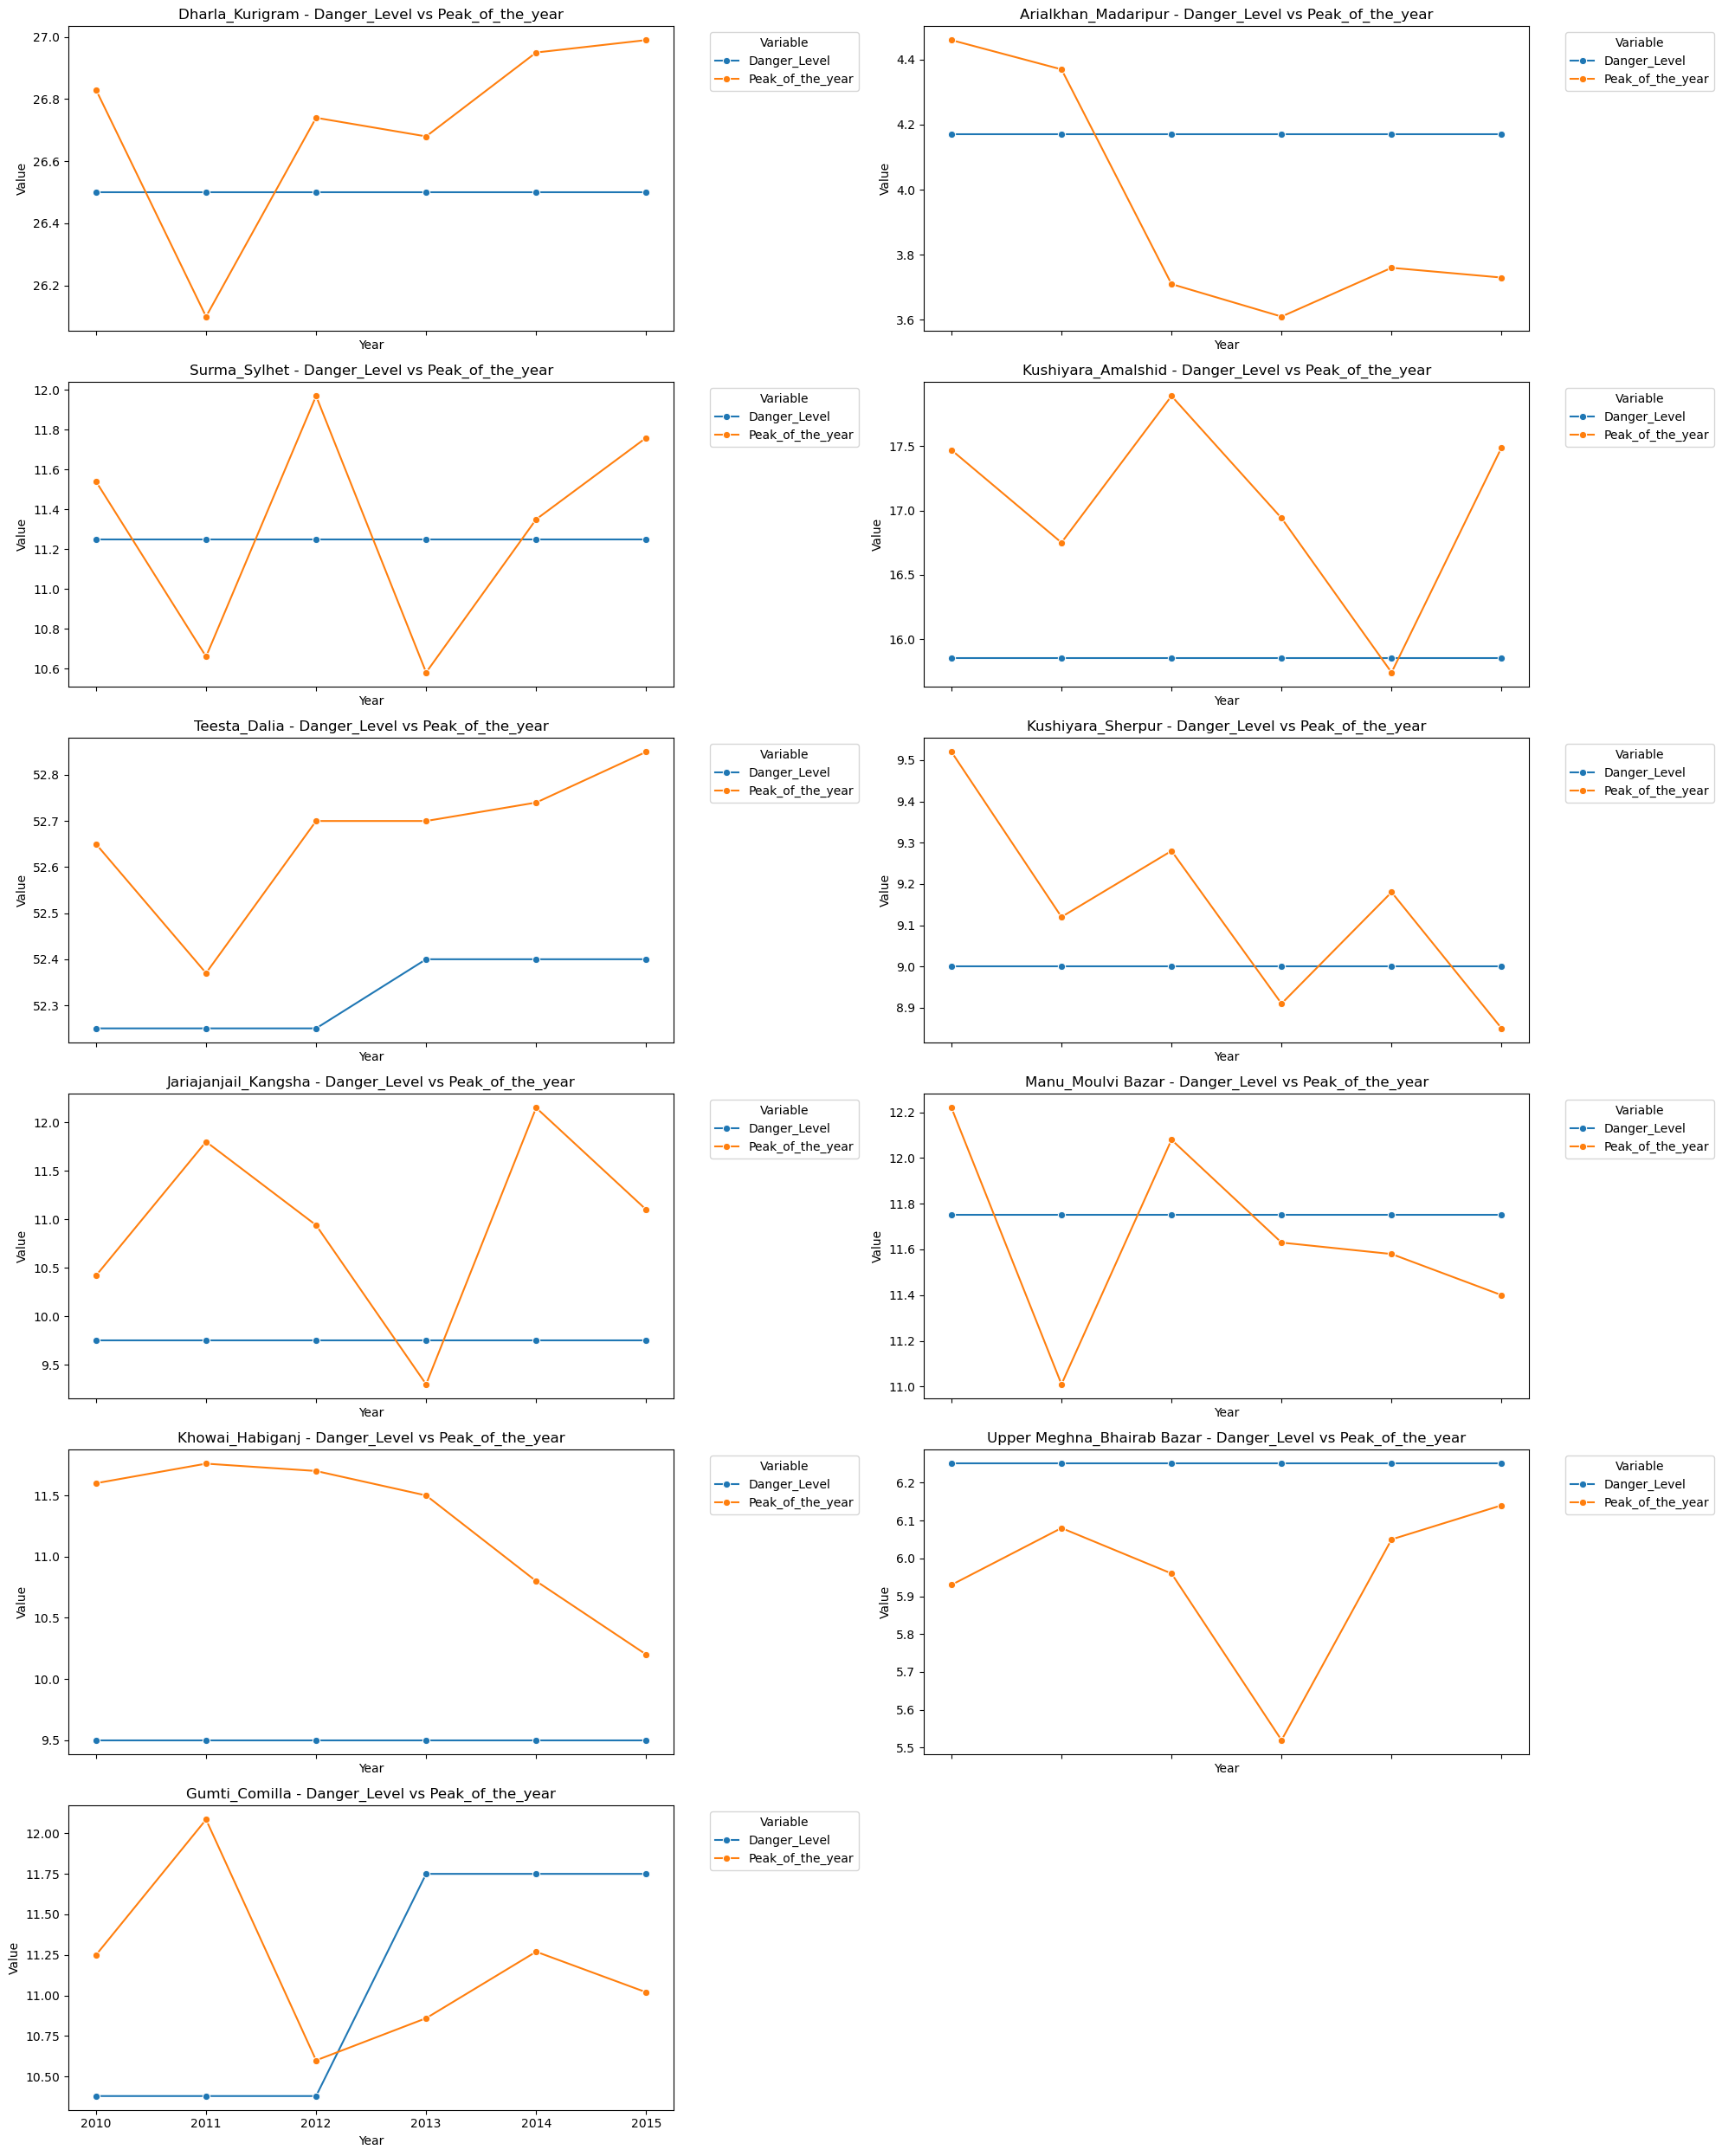

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['River_Station'] = df['River'] + '_' + df['Station']

selected_stations = [
    'Dharla_Kurigram', 'Arialkhan_Madaripur', 'Surma_Sylhet', 'Kushiyara_Amalshid', 'Teesta_Dalia',
    'Kushiyara_Sherpur', 'Jariajanjail_Kangsha', 'Manu_Moulvi Bazar', 'Khowai_Habiganj',
    'Upper Meghna_Bhairab Bazar', 'Gumti_Comilla'
]

fig, axs = plt.subplots(6, 2, figsize=(20, 25), sharex=True)

axs = axs.flatten()

for i, station in enumerate(selected_stations):
    data = df[df['River_Station'] == station]

    axs[i].set_title(f'{station} - Danger_Level vs Peak_of_the_year')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')

    sns.lineplot(data=data, x='Year', y='Danger_Level', marker='o', label='Danger_Level', ax=axs[i])
    sns.lineplot(data=data, x='Year', y='Peak_of_the_year', marker='o', label='Peak_of_the_year', ax=axs[i])

    axs[i].legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')


for i in range(len(selected_stations), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


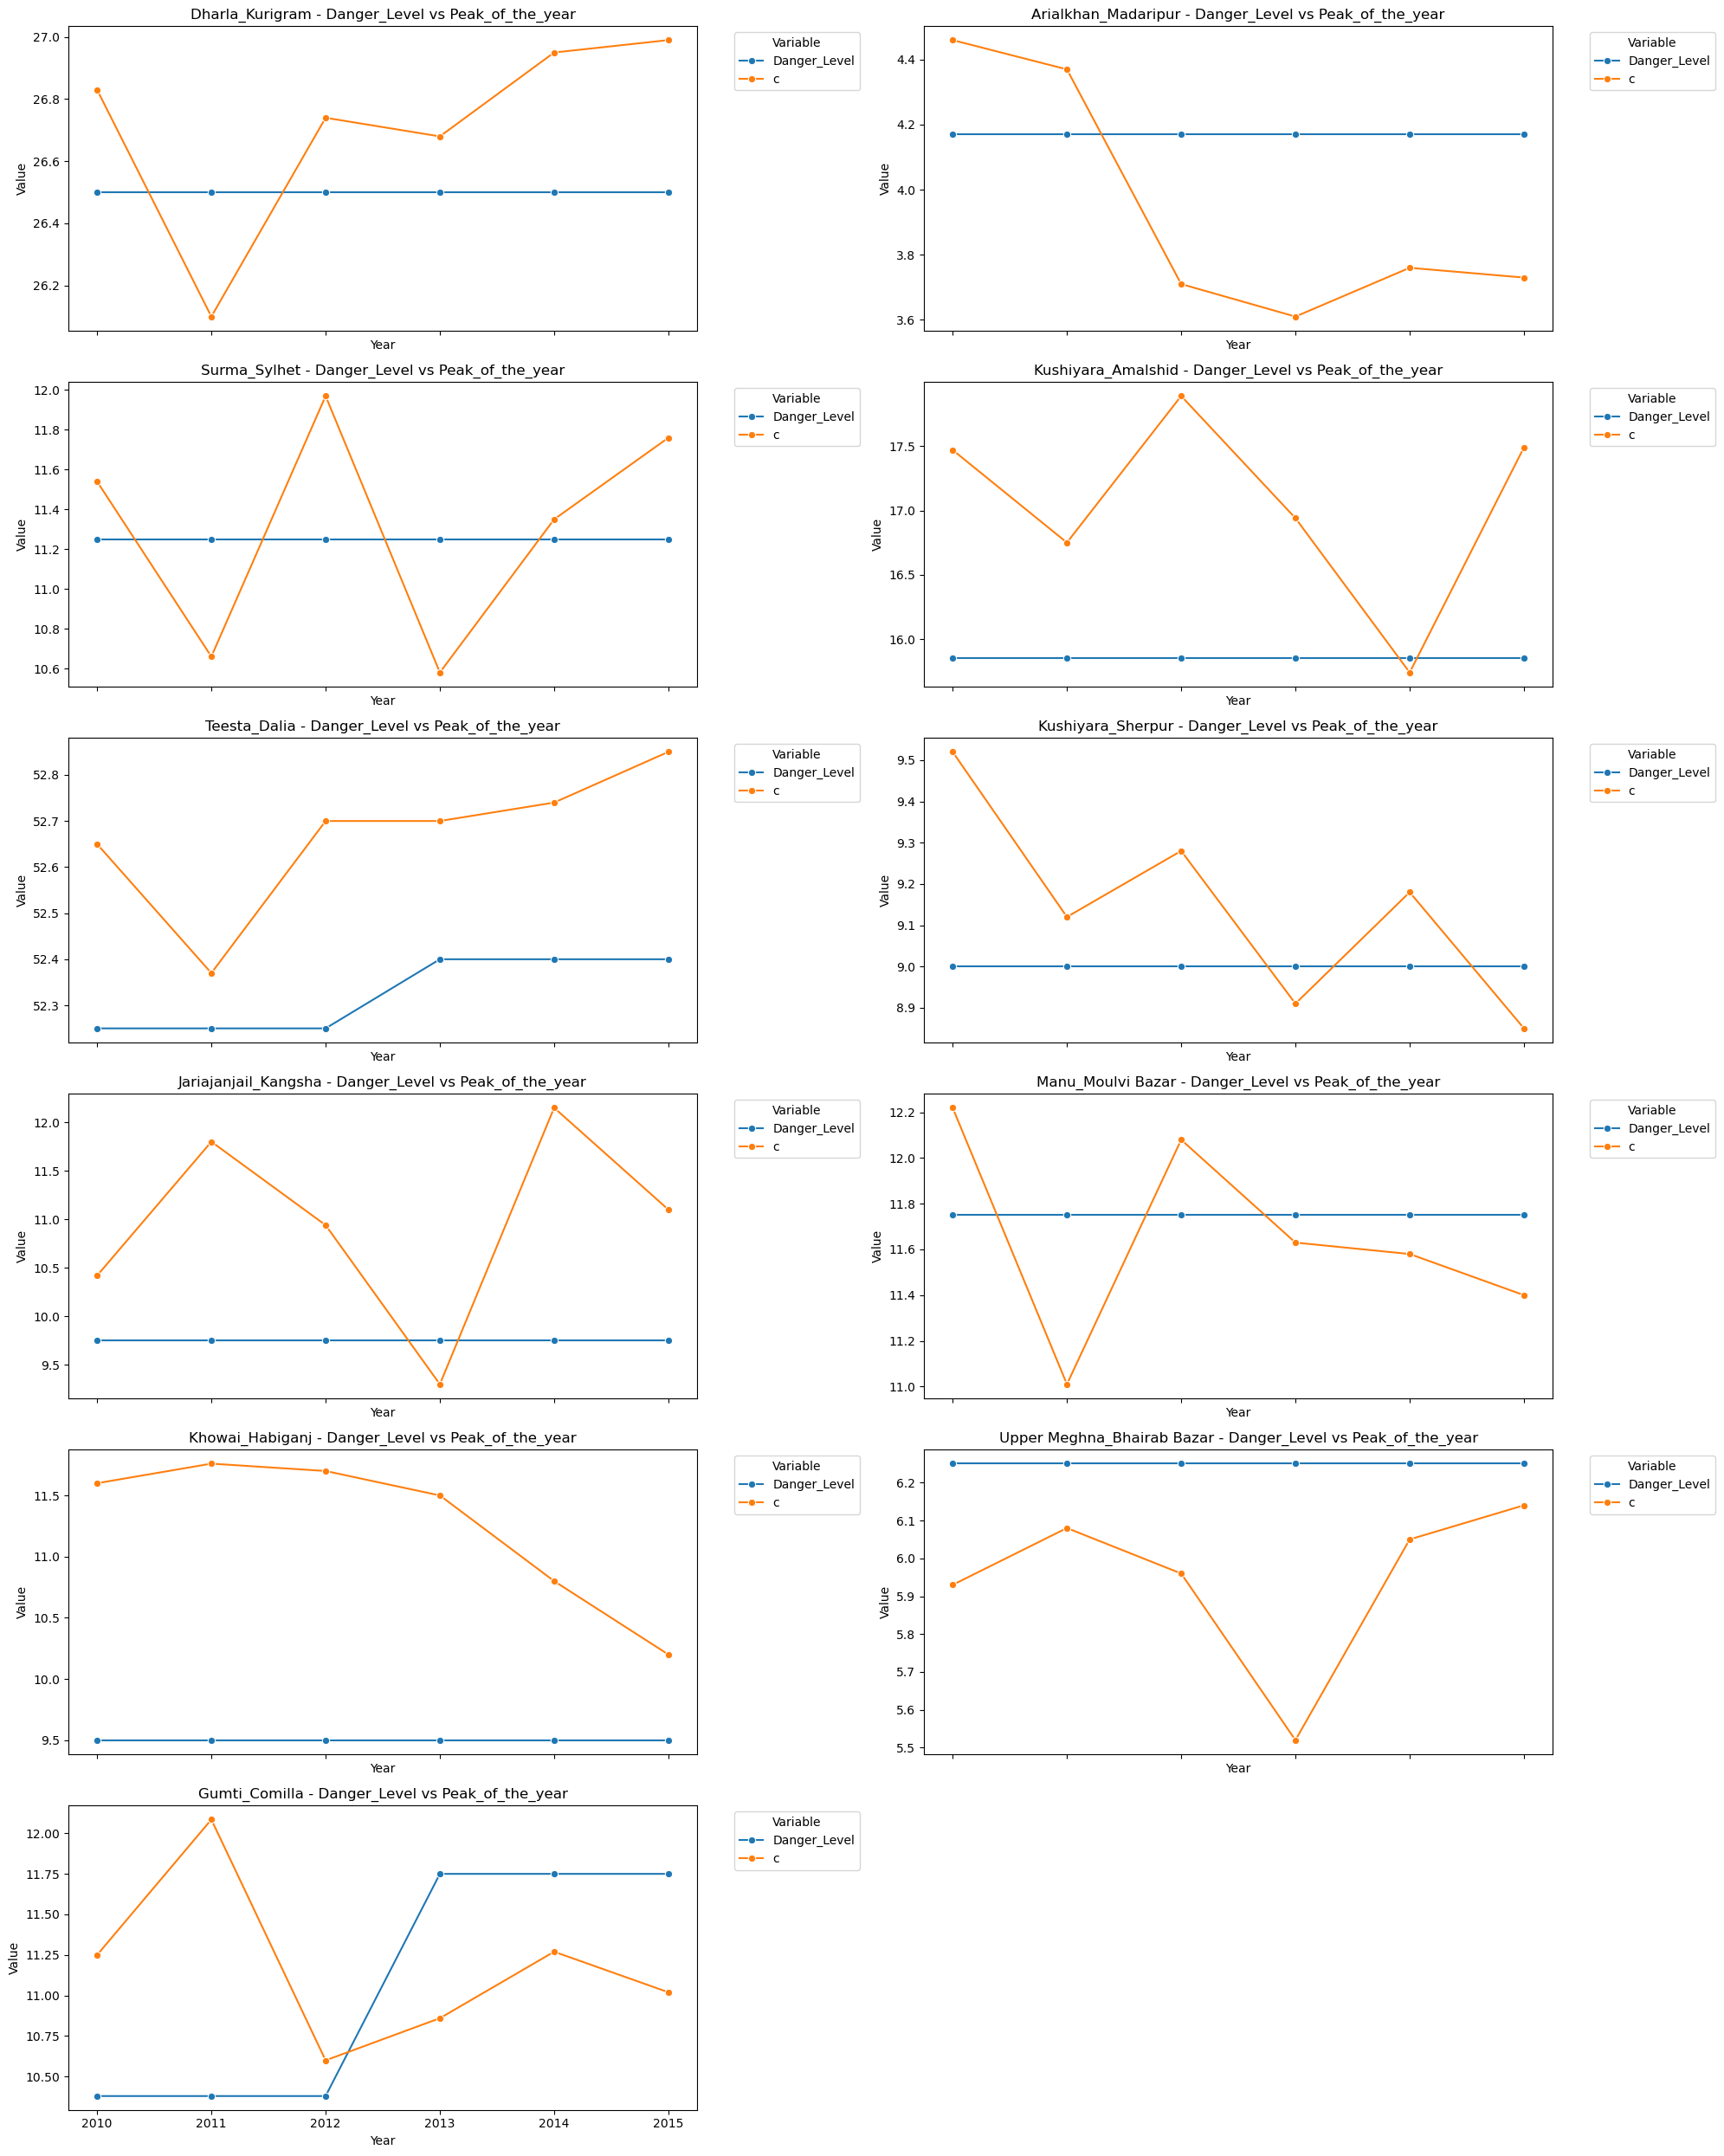

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_stations = [
    'Dharla_Kurigram', 'Arialkhan_Madaripur', 'Surma_Sylhet', 'Kushiyara_Amalshid', 'Teesta_Dalia',
    'Kushiyara_Sherpur', 'Jariajanjail_Kangsha', 'Manu_Moulvi Bazar', 'Khowai_Habiganj',
    'Upper Meghna_Bhairab Bazar', 'Gumti_Comilla'
]

fig, axs = plt.subplots(6, 2, figsize=(20, 25), sharex=True)

axs = axs.flatten()

for i, station in enumerate(selected_stations):
    data = df[df['River_Station'] == station]

    axs[i].set_title(f'{station} - Danger_Level vs Peak_of_the_year')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')

    # Set x-ticks to display years from 2010 to 2015
    axs[i].set_xticks(data['Year'].unique())

    sns.lineplot(data=data, x='Year', y='Danger_Level', marker='o', label='Danger_Level', ax=axs[i])
    sns.lineplot(data=data, x='Year', y='Peak_of_the_year', marker='o', label='c', ax=axs[i])

    axs[i].legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')

for i in range(len(selected_stations), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


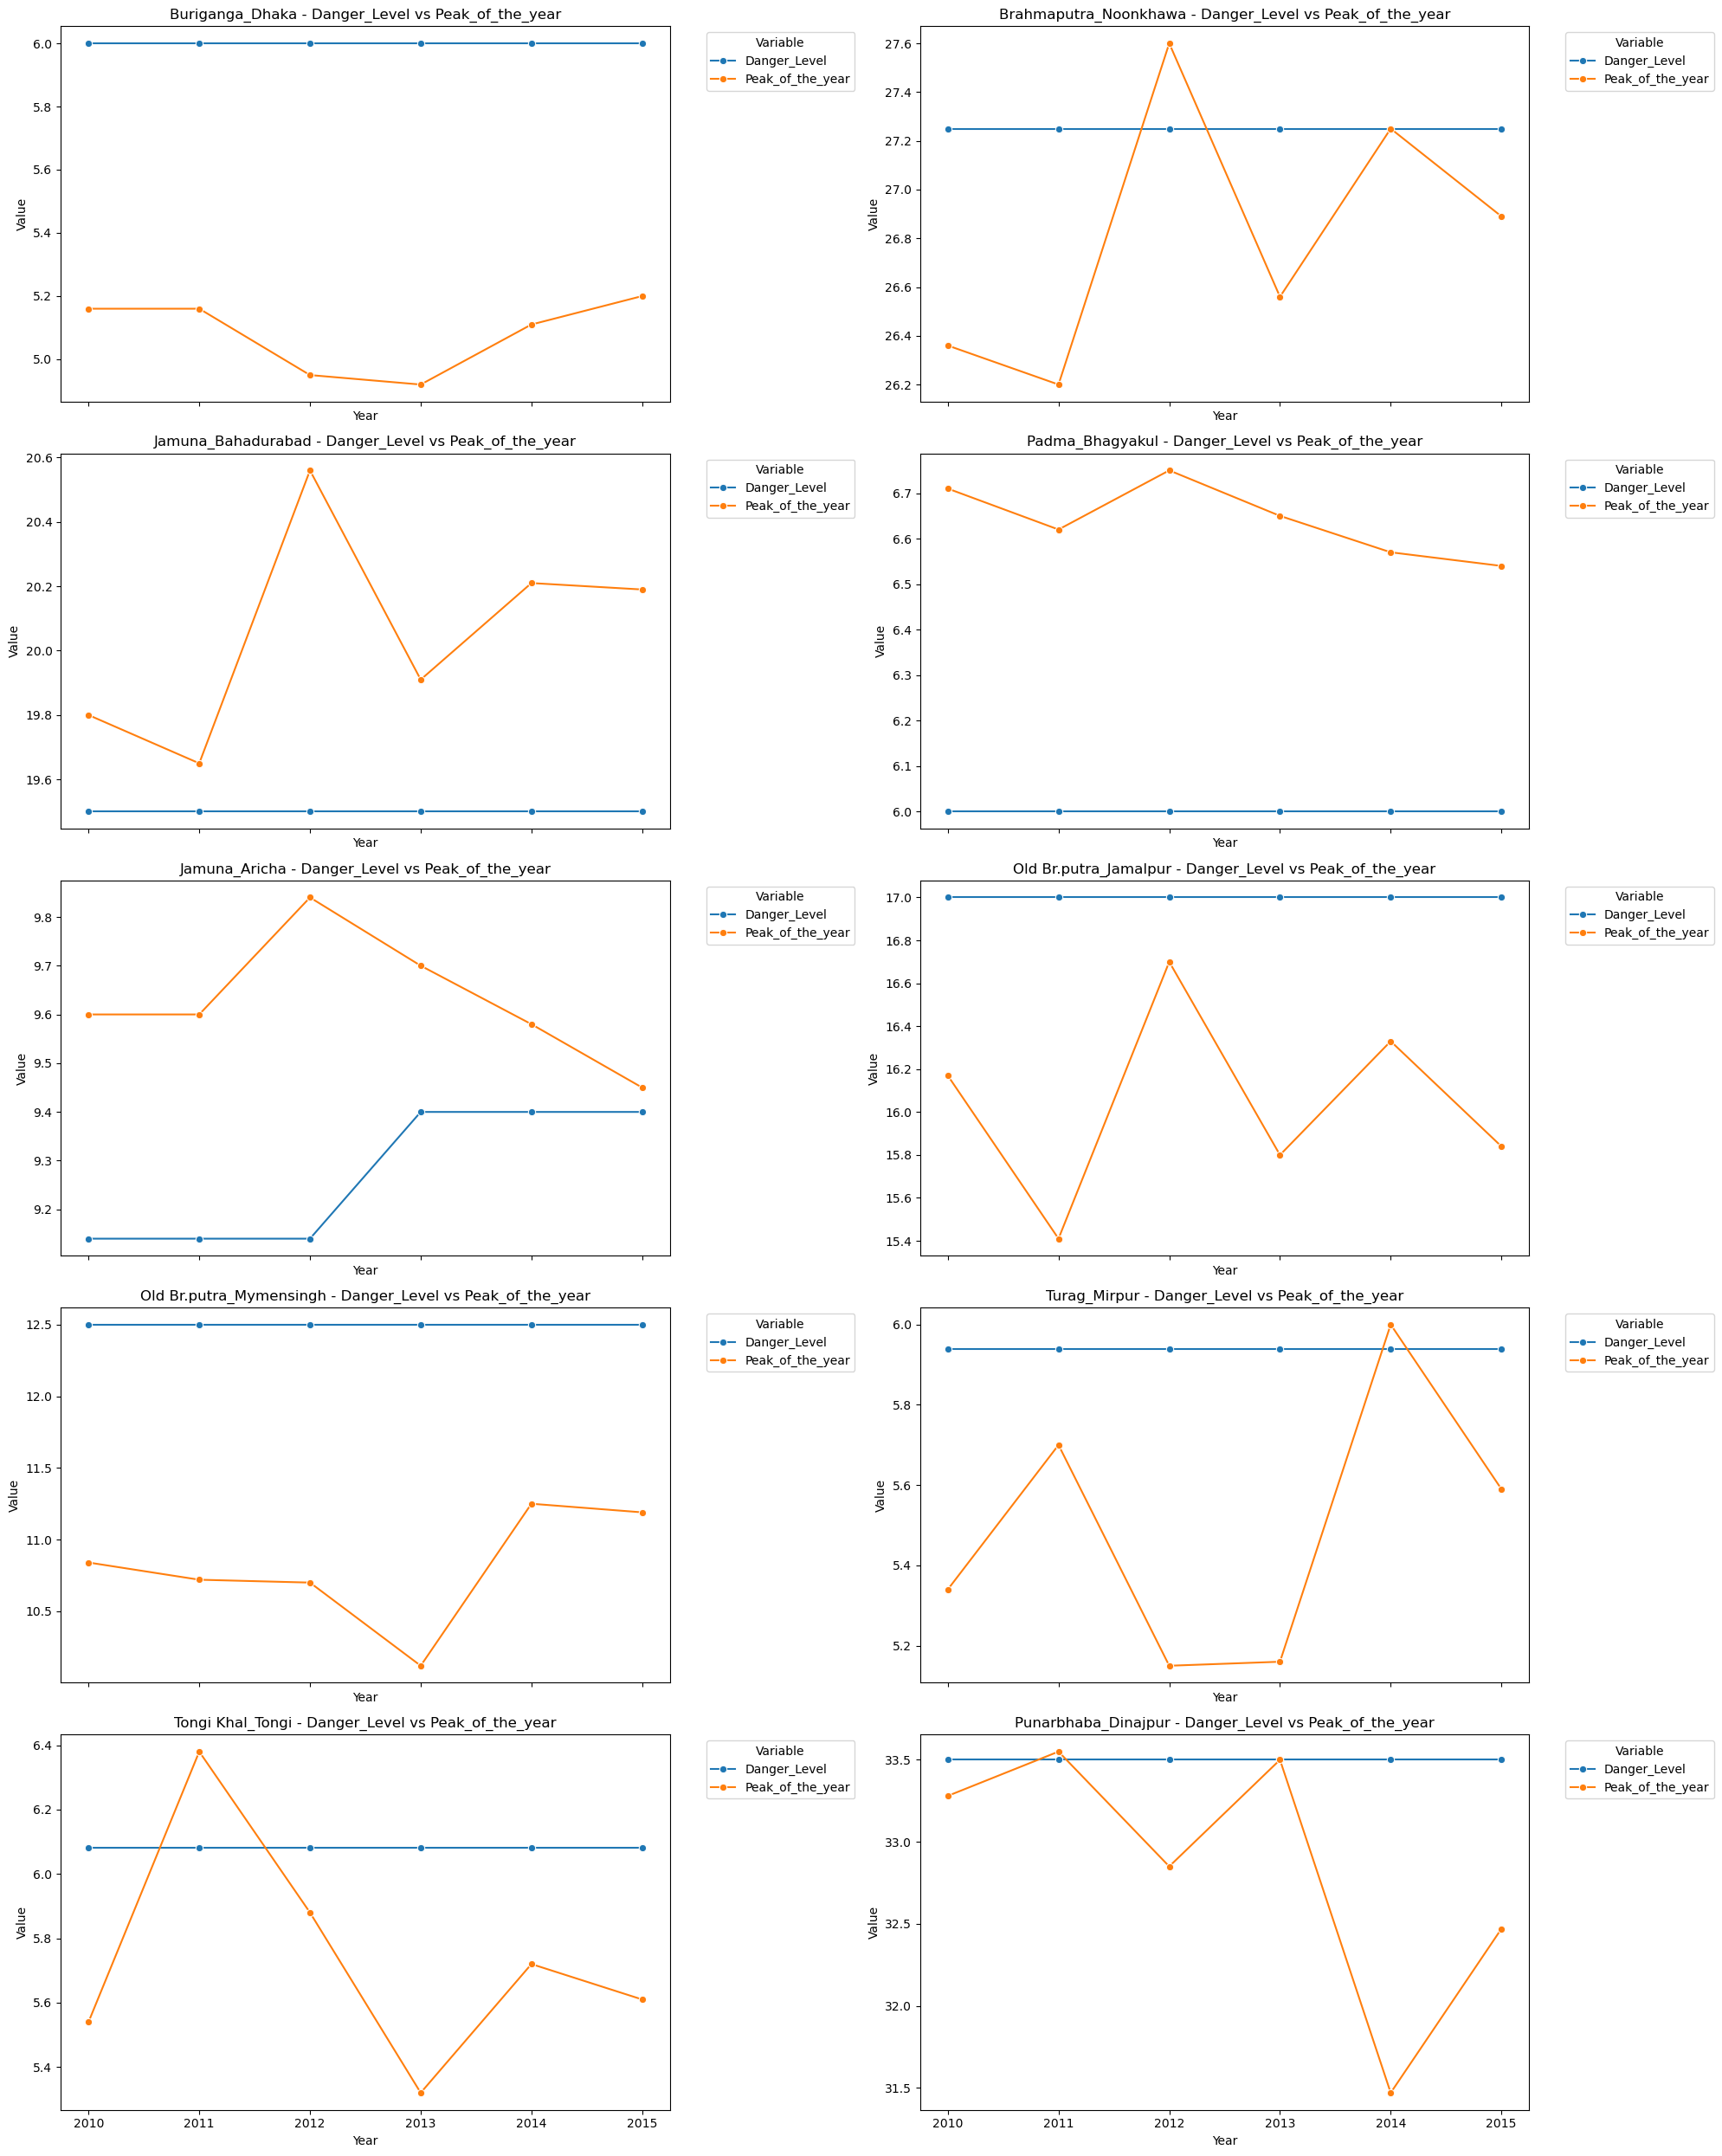

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


selected_stations = [
'Buriganga_Dhaka', 'Brahmaputra_Noonkhawa', 'Jamuna_Bahadurabad', 'Padma_Bhagyakul', 
    'Jamuna_Aricha', 'Old Br.putra_Jamalpur', 'Old Br.putra_Mymensingh', 'Turag_Mirpur', 
    'Tongi Khal_Tongi', 'Punarbhaba_Dinajpur'
]

fig, axs = plt.subplots(5, 2, figsize=(20, 25), sharex=True)

axs = axs.flatten()

for i, station in enumerate(selected_stations):
    data = df[df['River_Station'] == station]

    axs[i].set_title(f'{station} - Danger_Level vs Peak_of_the_year')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')

    sns.lineplot(data=data, x='Year', y='Danger_Level', marker='o', label='Danger_Level', ax=axs[i])
    sns.lineplot(data=data, x='Year', y='Peak_of_the_year', marker='o', label='Peak_of_the_year', ax=axs[i])

    axs[i].legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')

for i in range(len(selected_stations), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


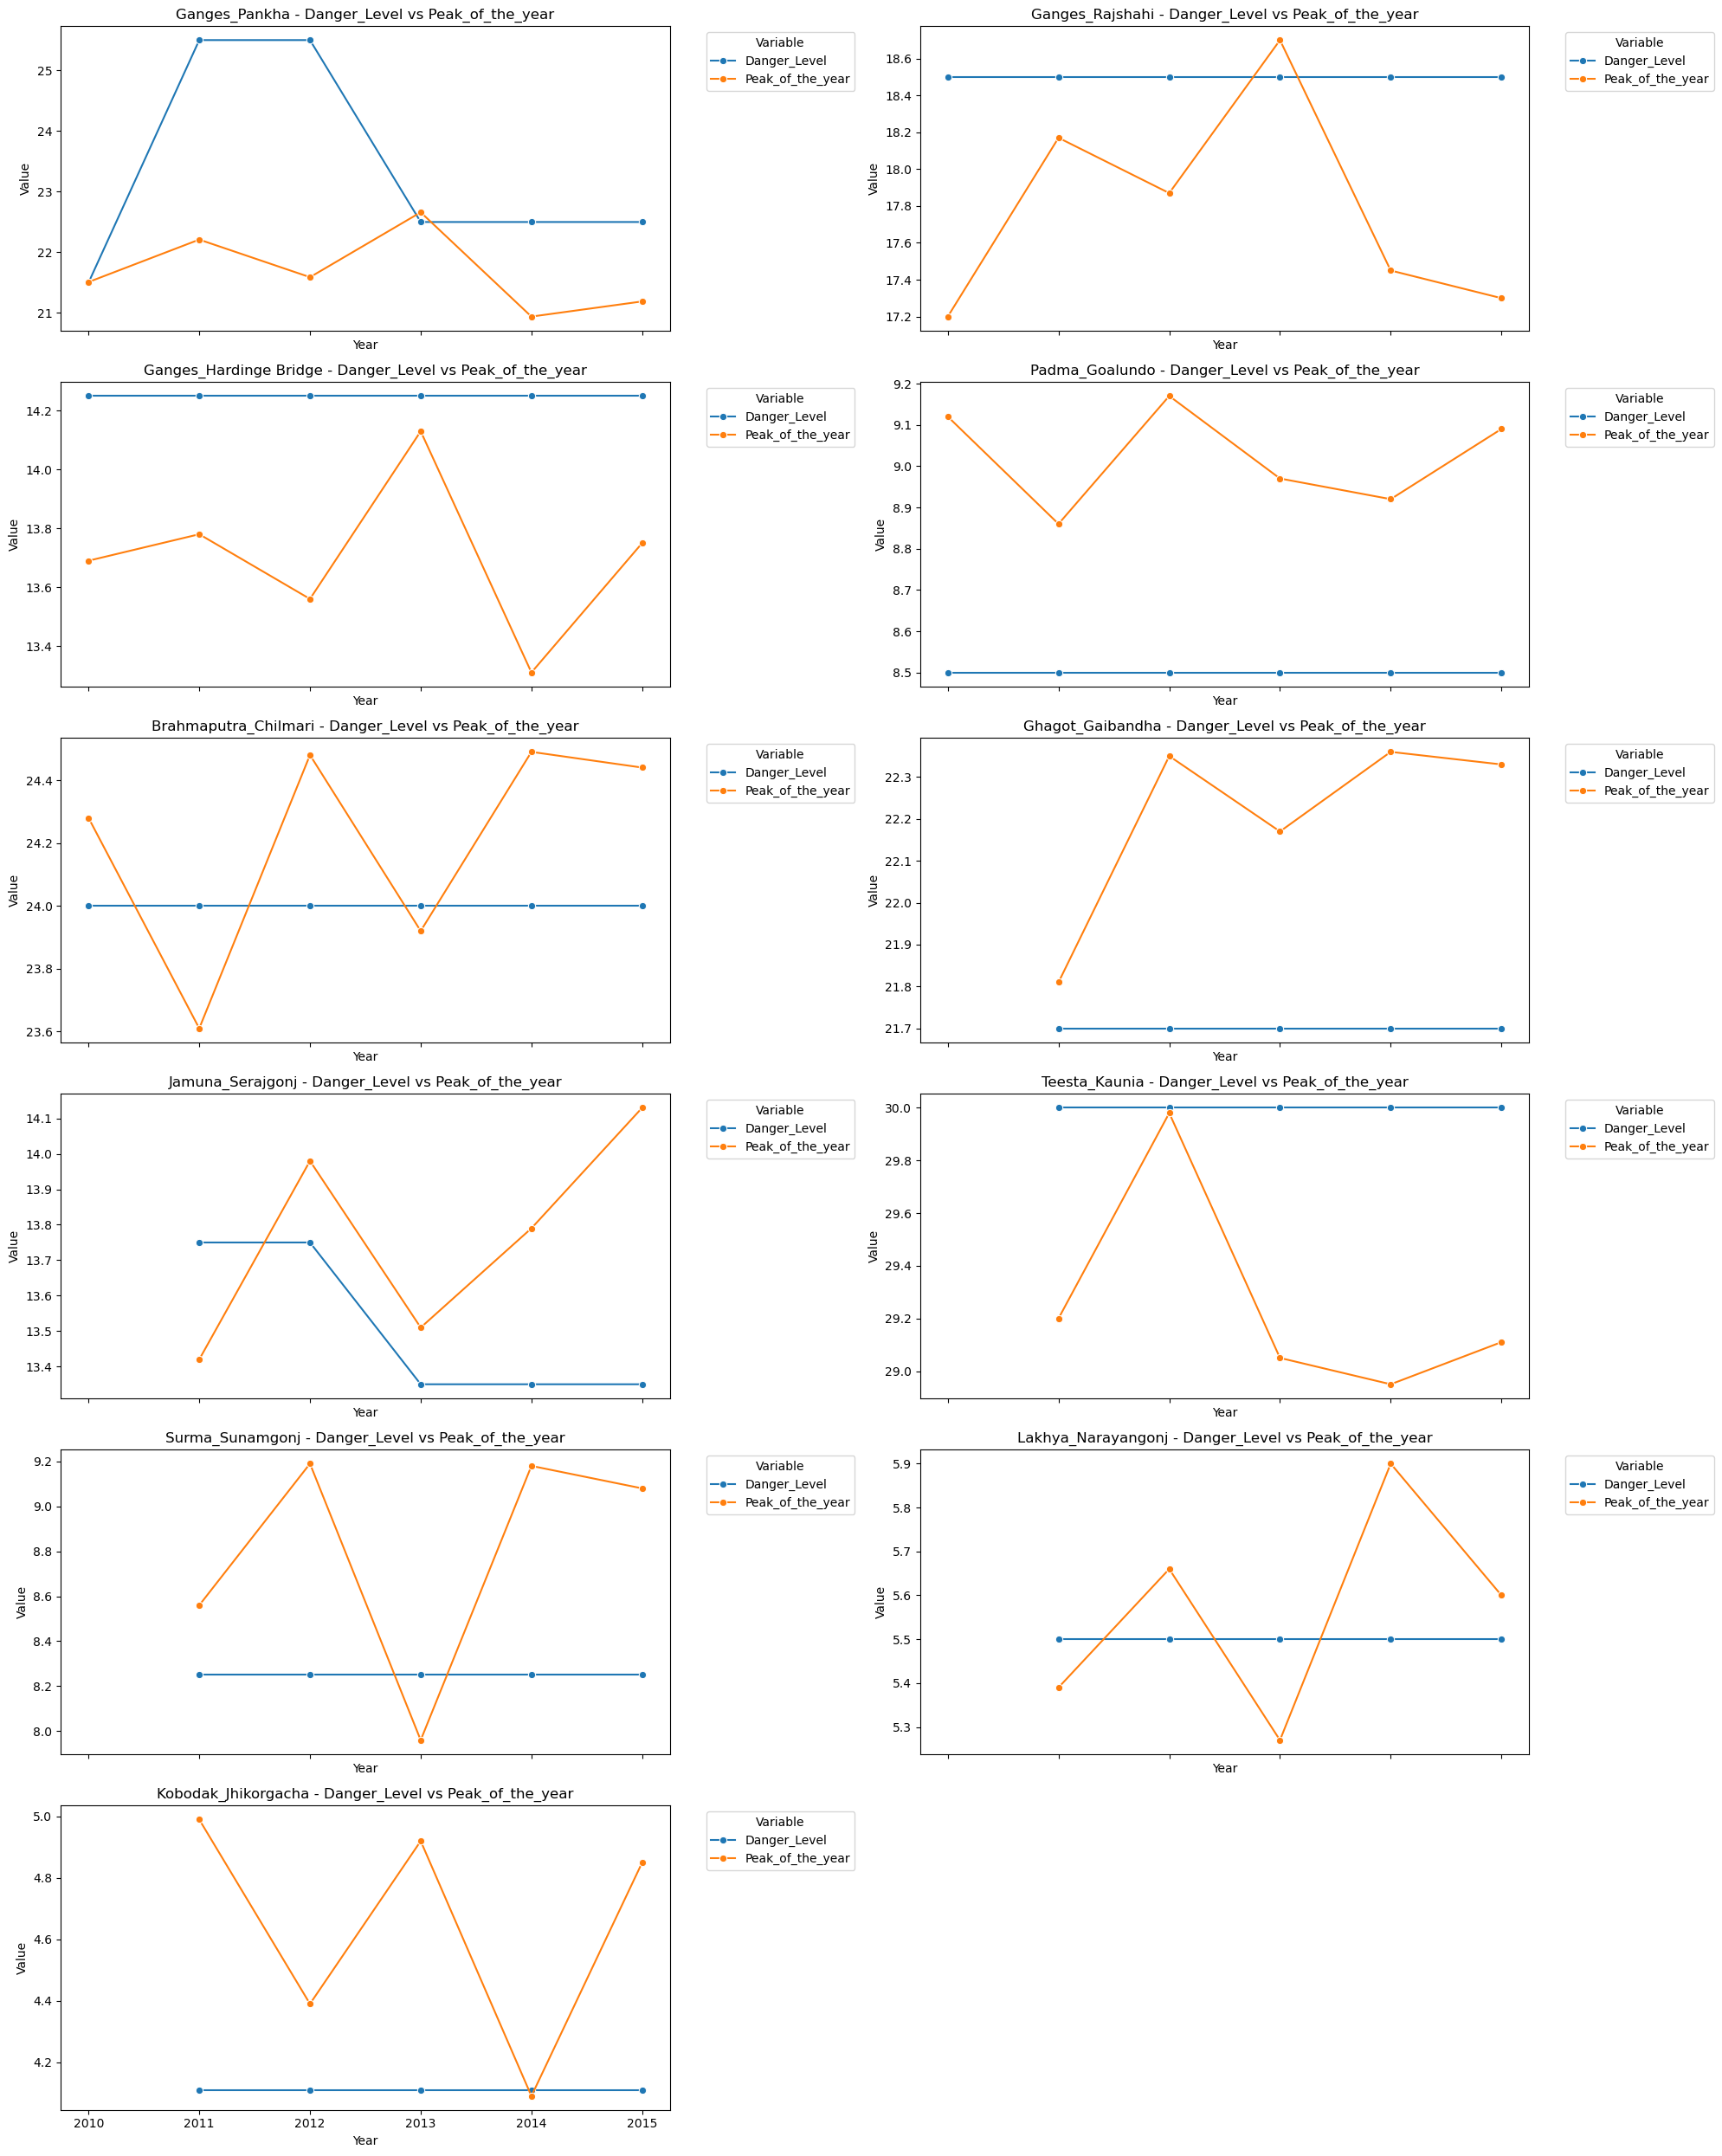

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


selected_stations = [
'Ganges_Pankha', 'Ganges_Rajshahi', 'Ganges_Hardinge Bridge', 'Padma_Goalundo', 
    'Brahmaputra_Chilmari', 'Ghagot_Gaibandha', 'Jamuna_Serajgonj', 'Teesta_Kaunia', 
    'Surma_Sunamgonj', 'Lakhya_Narayangonj', 'Kobodak_Jhikorgacha'
]

fig, axs = plt.subplots(6, 2, figsize=(20, 25), sharex=True)

axs = axs.flatten()

for i, station in enumerate(selected_stations):
    data = df[df['River_Station'] == station]

    axs[i].set_title(f'{station} - Danger_Level vs Peak_of_the_year')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')

    sns.lineplot(data=data, x='Year', y='Danger_Level', marker='o', label='Danger_Level', ax=axs[i])
    sns.lineplot(data=data, x='Year', y='Peak_of_the_year', marker='o', label='Peak_of_the_year', ax=axs[i])

    axs[i].legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')

for i in range(len(selected_stations), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


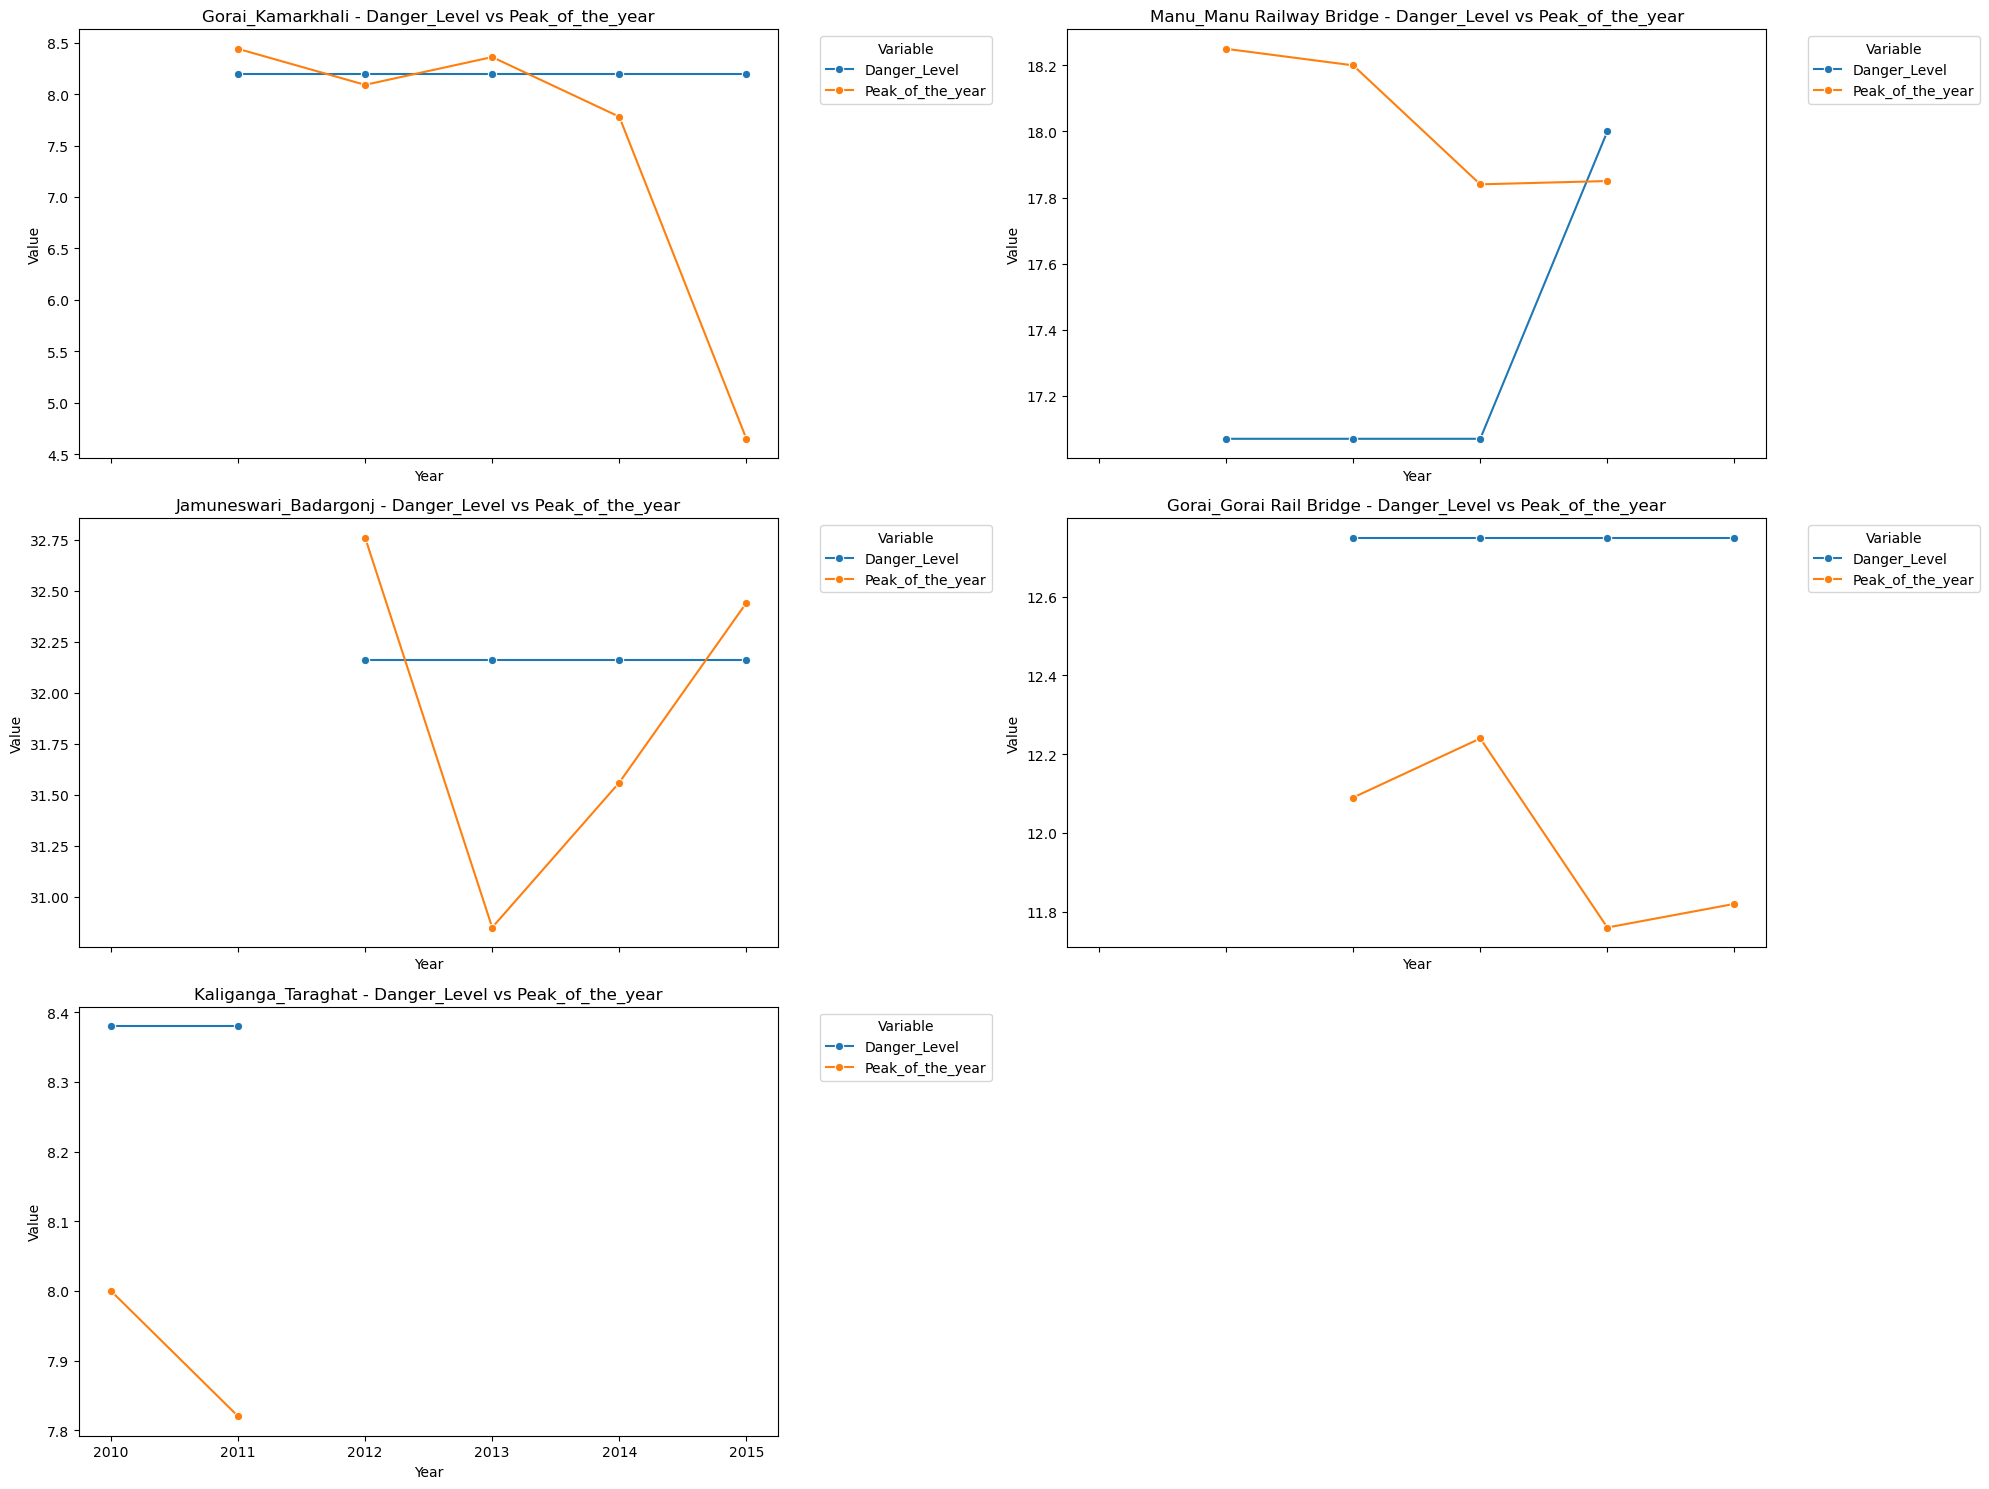

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_stations = [
'Gorai_Kamarkhali', 'Manu_Manu Railway Bridge', 'Jamuneswari_Badargonj', 'Gorai_Gorai Rail Bridge', 'Kaliganga_Taraghat']

fig, axs = plt.subplots(3, 2, figsize=(20, 15), sharex=True)

axs = axs.flatten()

for i, station in enumerate(selected_stations):
    data = df[df['River_Station'] == station]

    axs[i].set_title(f'{station} - Danger_Level vs Peak_of_the_year')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')

    sns.lineplot(data=data, x='Year', y='Danger_Level', marker='o', label='Danger_Level', ax=axs[i])
    sns.lineplot(data=data, x='Year', y='Peak_of_the_year', marker='o', label='Peak_of_the_year', ax=axs[i])

    axs[i].legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')

for i in range(len(selected_stations), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [23]:
df['River_Station']

0            Dharla_Kurigram
1               Teesta_Dalia
2             Teesta_Kaunias
3      Brahmaputra_Noonkhawa
4       Brahmaputra_Chilmari
               ...          
268          Sangu_Bandarban
269           Sangu_Dohazari
270          Matamuhuri_Lama
271      Matamuhuri_Chiringa
272             Feni_Ramgarh
Name: River_Station, Length: 273, dtype: object

#### Label Encoding

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ['River','Station','Basin','River_Station']

for col in columns:
    df[col]=le.fit_transform(df[col])
    
print(le.classes_)

['Arialkhan_Madaripur' 'Brahmaputra_Chilmari' 'Brahmaputra_Noonkhawa'
 'Buriganga_Dhaka' 'Dharla_Kurigram' 'Feni_Ramgarh'
 'Ganges_Hardinge Bridge' 'Ganges_Pankha' 'Ganges_Rajshahi'
 'Ghagot_Gaibandha' 'Gorai_Gorai Rail Bridge' 'Gorai_Gorai Railway Bridge'
 'Gorai_Gorai Rly Bridge' 'Gorai_Kamarkhali' 'Gumti_Comilla'
 'Halda_Narayanhat' 'Halda_Panchpukuria' 'Jamuna_Aricha'
 'Jamuna_Bahadurabad' 'Jamuna_Serajganj' 'Jamuna_Serajgonj'
 'Jamuneswari_Badargonj' 'Jariajanjail_Kangsha' 'Kaliganga_Taraghat'
 'Khowai_Habiganj' 'Kobodak_Jhikorgacha' 'Kushiyara_Amalshid'
 'Kushiyara_Sheola' 'Kushiyara_Sherpur' 'Lakhya_Narayanganj'
 'Lakhya_Narayangonj' 'Manu_Manu RB' 'Manu_Manu Railway Bridge'
 'Manu_Manu Rly Br' 'Manu_Moulvi Bazar' 'Matamuhuri_Chiringa'
 'Matamuhuri_Lama' 'Muhuri_Parshuram' 'Old Br.putra_Jamalpur'
 'Old Br.putra_Mymensingh' 'Padma_Bhagyakul' 'Padma_Goalundo'
 'Punarbhaba_Dinajpur' 'Sangu_Bandarban' 'Sangu_Dohazari'
 'Surma_Kanaighat' 'Surma_Sunamganj' 'Surma_Sunamgonj' 'Surma_Syl

In [25]:
display(df.head(10))

,Year,River,Station,Basin,Recorded_Maximum,Danger_Level,Peak_of_the_year,Days_above_Danger_level,River_Station
0,2010,3,28,0,27.66,26.50,26.83,4.0,4
1,2010,26,10,0,52.97,52.25,52.65,9.0,49
2,2010,26,27,0,30.52,30.00,29.44,0.0,51
3,2010,1,40,0,28.10,27.25,26.36,0.0,2
4,2010,1,7,0,25.06,24.00,24.28,14.0,1
5,2010,10,3,0,20.62,19.50,19.80,22.0,18
6,2010,10,46,0,15.12,13.75,13.83,15.0,19
7,2010,10,1,0,10.76,9.14,9.60,10.0,17
8,2010,21,21,0,18.00,17.00,16.17,0.0,38
9,2010,21,36,0,14.02,12.50,10.84,0.0,39


In [26]:
df_pearsoncor = df.corr()
display(df_pearsoncor)

,Year,River,Station,Basin,Recorded_Maximum,Danger_Level,Peak_of_the_year,Days_above_Danger_level,River_Station
Year,1.000000,-0.012605,-0.034432,0.022687,0.015491,0.022046,0.013803,-0.076187,-0.012999
River,-0.012605,1.000000,-0.002188,0.160155,-0.058433,-0.067670,-0.054902,0.072659,0.997231
Station,-0.034432,-0.002188,1.000000,0.103110,-0.163912,-0.157108,-0.171076,-0.004547,0.014562
Basin,0.022687,0.160155,0.103110,1.000000,-0.228392,-0.291533,-0.267660,-0.002675,0.141216
Recorded_Maximum,0.015491,-0.058433,-0.163912,-0.228392,1.000000,0.992904,0.988021,-0.152109,-0.051935
Danger_Level,0.022046,-0.067670,-0.157108,-0.291533,0.992904,1.000000,0.992632,-0.145366,-0.060441
Peak_of_the_year,0.013803,-0.054902,-0.171076,-0.267660,0.988021,0.992632,1.000000,-0.116989,-0.048569
Days_above_Danger_level,-0.076187,0.072659,-0.004547,-0.002675,-0.152109,-0.145366,-0.116989,1.000000,0.056024
River_Station,-0.012999,0.997231,0.014562,0.141216,-0.051935,-0.060441,-0.048569,0.056024,1.000000


#### Find Pearson Correlation Between The Variables

In [27]:
df_pearsoncor = df.corr()
df_pearsoncor=df_pearsoncor.abs()
display(df_pearsoncor)

,Year,River,Station,Basin,Recorded_Maximum,Danger_Level,Peak_of_the_year,Days_above_Danger_level,River_Station
Year,1.000000,0.012605,0.034432,0.022687,0.015491,0.022046,0.013803,0.076187,0.012999
River,0.012605,1.000000,0.002188,0.160155,0.058433,0.067670,0.054902,0.072659,0.997231
Station,0.034432,0.002188,1.000000,0.103110,0.163912,0.157108,0.171076,0.004547,0.014562
Basin,0.022687,0.160155,0.103110,1.000000,0.228392,0.291533,0.267660,0.002675,0.141216
Recorded_Maximum,0.015491,0.058433,0.163912,0.228392,1.000000,0.992904,0.988021,0.152109,0.051935
Danger_Level,0.022046,0.067670,0.157108,0.291533,0.992904,1.000000,0.992632,0.145366,0.060441
Peak_of_the_year,0.013803,0.054902,0.171076,0.267660,0.988021,0.992632,1.000000,0.116989,0.048569
Days_above_Danger_level,0.076187,0.072659,0.004547,0.002675,0.152109,0.145366,0.116989,1.000000,0.056024
River_Station,0.012999,0.997231,0.014562,0.141216,0.051935,0.060441,0.048569,0.056024,1.000000


#### Find Spearman rank Correlation Between The Variables

In [28]:
df_spearmancor = df.corr(method = 'spearman')
df_spearmancor=df_spearmancor.abs()
display(df_spearmancor)

,Year,River,Station,Basin,Recorded_Maximum,Danger_Level,Peak_of_the_year,Days_above_Danger_level,River_Station
Year,1.000000,0.012020,0.033379,0.005513,0.013295,0.023778,0.009704,0.109268,0.012082
River,0.012020,1.000000,0.010809,0.145055,0.181886,0.203882,0.179803,0.062067,0.999194
Station,0.033379,0.010809,1.000000,0.113530,0.075089,0.067017,0.081962,0.047585,0.010769
Basin,0.005513,0.145055,0.113530,1.000000,0.152886,0.204008,0.161737,0.040192,0.144938
Recorded_Maximum,0.013295,0.181886,0.075089,0.152886,1.000000,0.983589,0.969863,0.149752,0.185099
Danger_Level,0.023778,0.203882,0.067017,0.204008,0.983589,1.000000,0.978051,0.124913,0.207577
Peak_of_the_year,0.009704,0.179803,0.081962,0.161737,0.969863,0.978051,1.000000,0.106173,0.184386
Days_above_Danger_level,0.109268,0.062067,0.047585,0.040192,0.149752,0.124913,0.106173,1.000000,0.059920
River_Station,0.012082,0.999194,0.010769,0.144938,0.185099,0.207577,0.184386,0.059920,1.000000


#### Heatmap of Correlation For Pearson Correlation

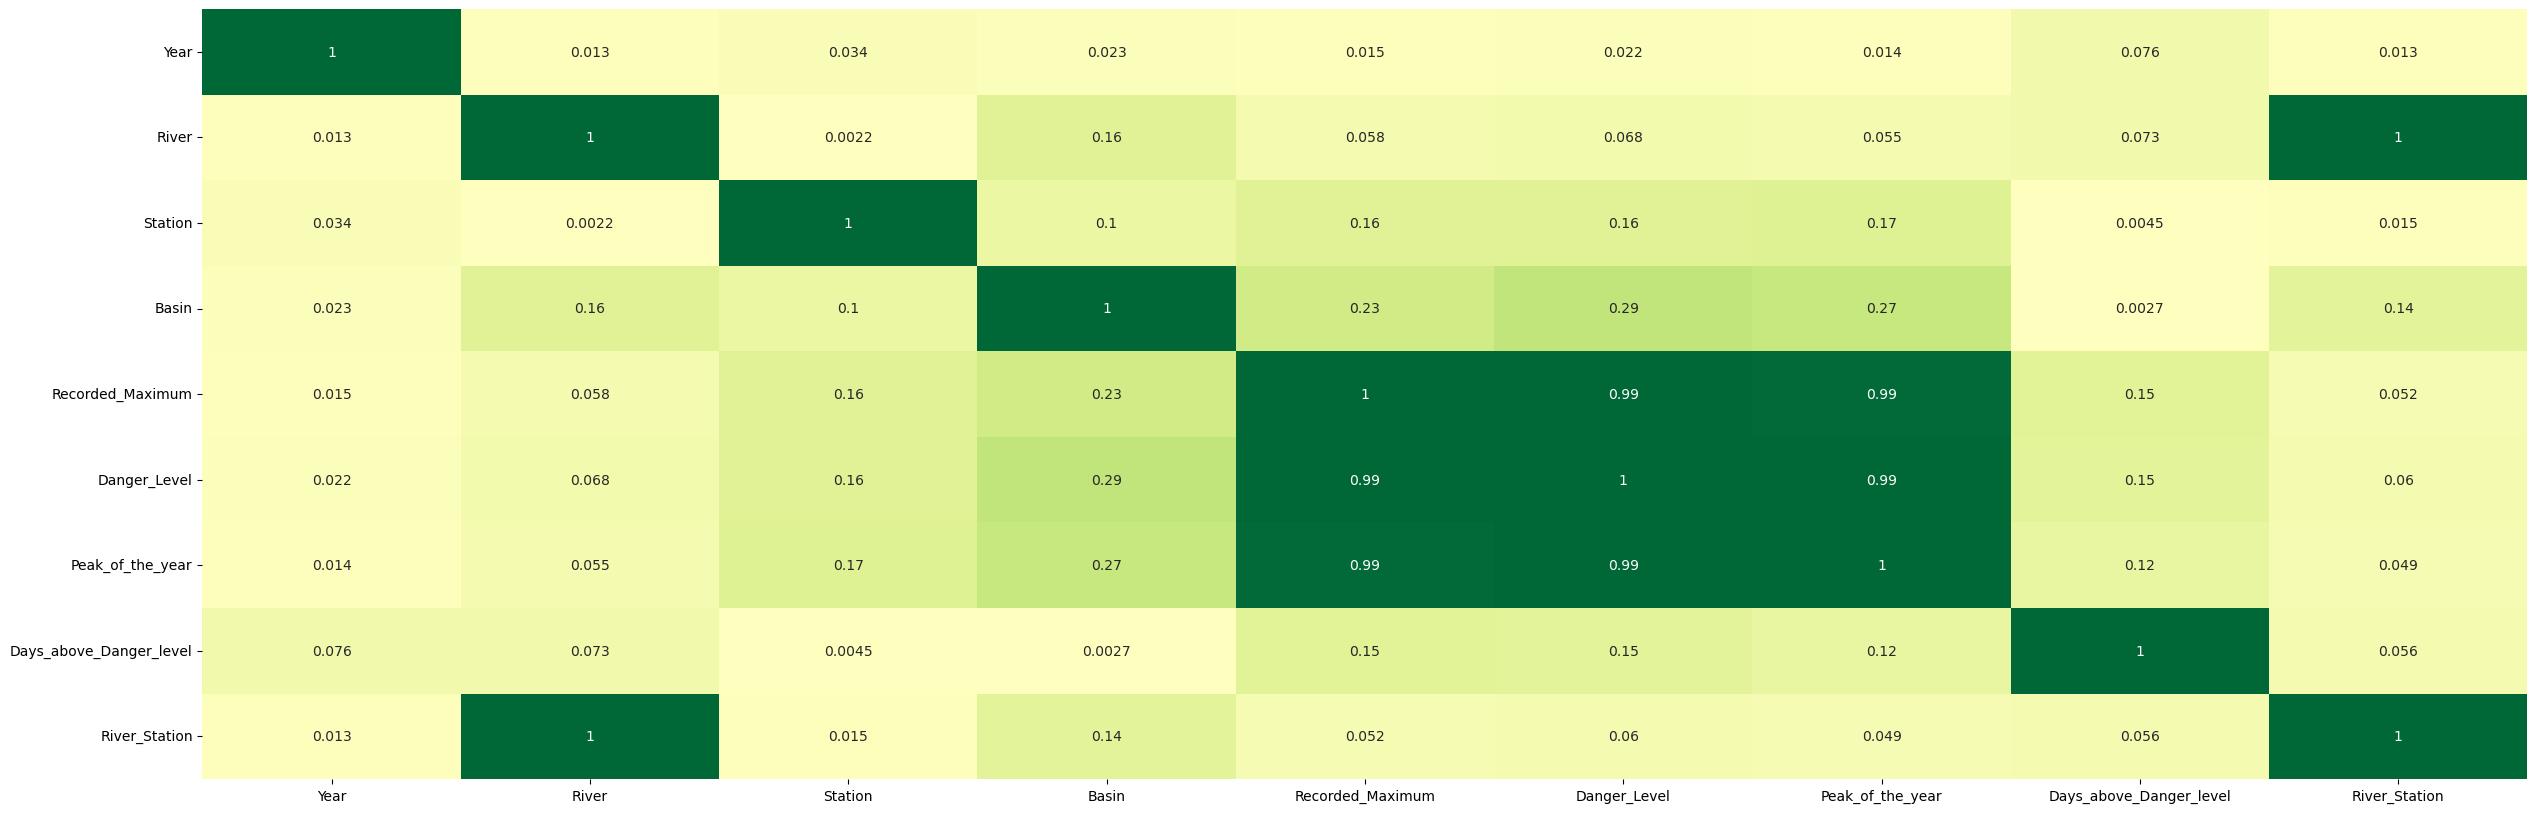

In [29]:
plt.figure(figsize=(30,10))
sns.heatmap(df_pearsoncor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1, cbar=False)
plt.show()

#### Scatterplots

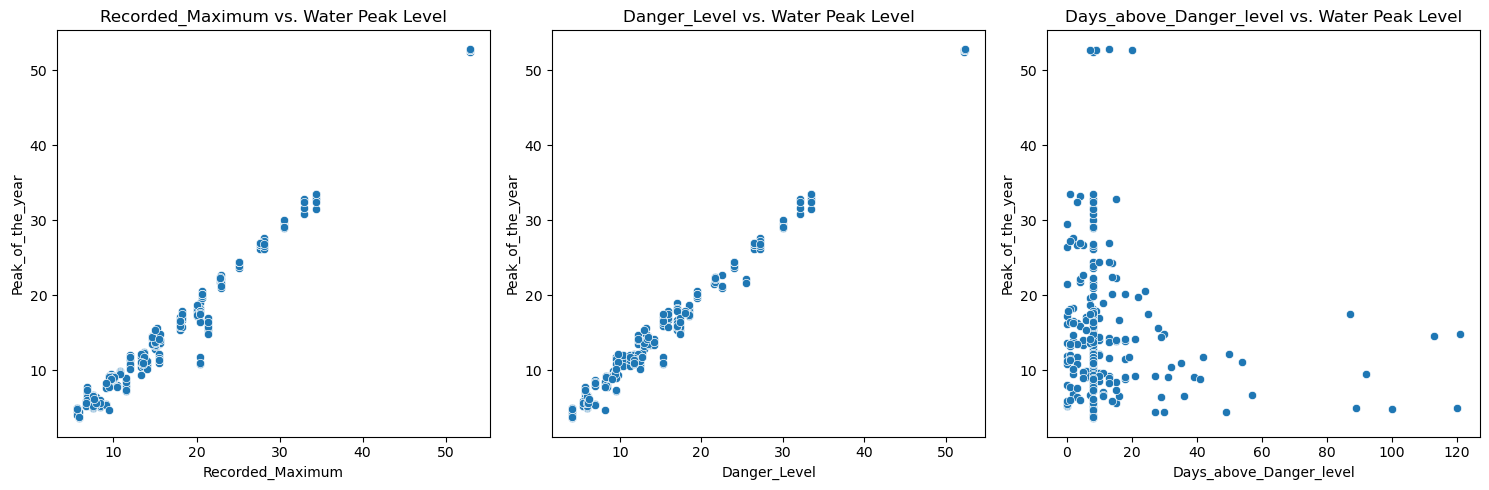

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Recorded_Maximum', 'Danger_Level', 'Days_above_Danger_level']

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='Peak_of_the_year', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Water Peak Level')

plt.tight_layout()
plt.show()


####  Scatter plots of the selected feature 'Days_above_Danger_level'

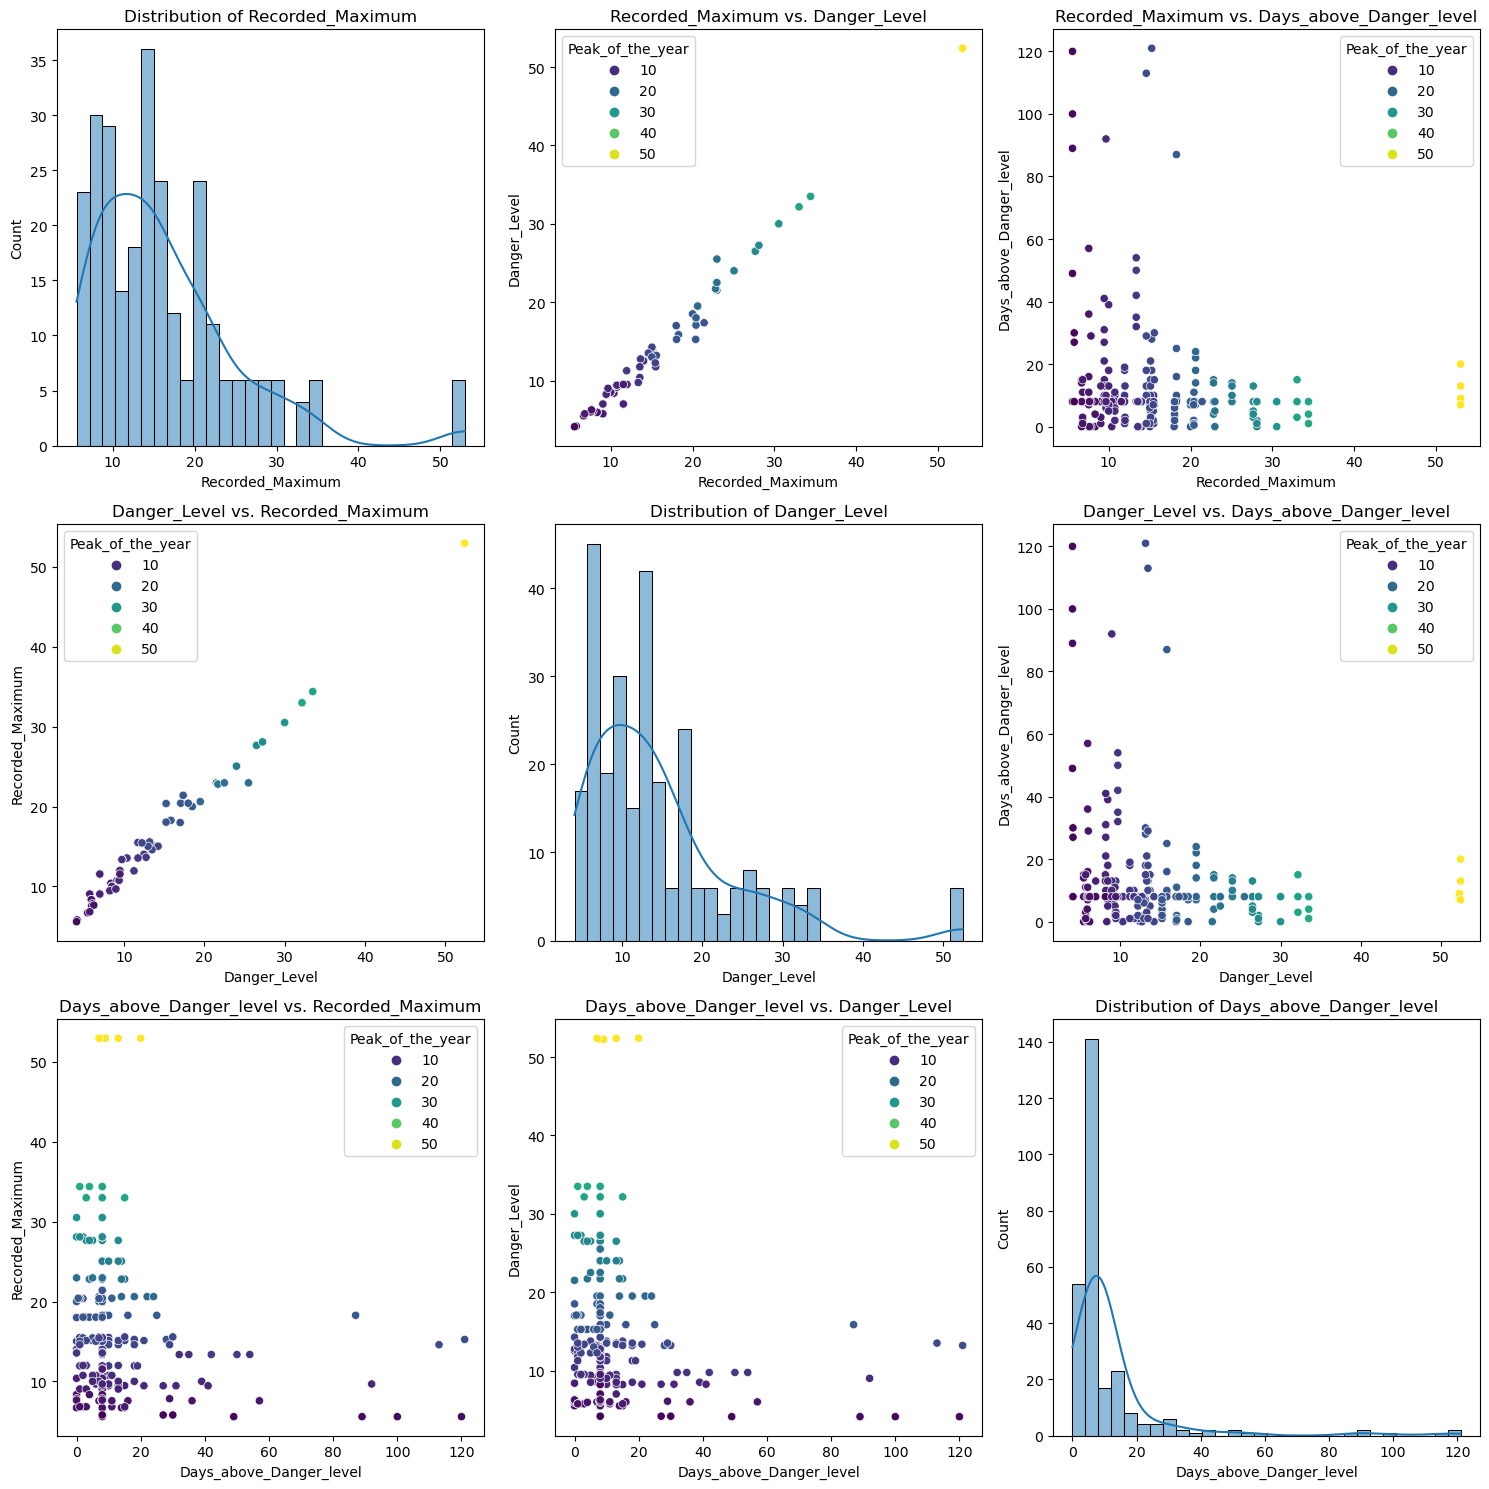

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Recorded_Maximum', 'Danger_Level', 'Days_above_Danger_level']

fig, axes = plt.subplots(nrows=len(features), ncols=len(features), figsize=(15, 15))

for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i == j:
            sns.histplot(df[feature1], kde=True, bins=30, ax=axes[i, j])
            axes[i, j].set_title(f'Distribution of {feature1}')
        else:
            sns.scatterplot(x=feature1, y=feature2, hue='Peak_of_the_year', data=df, ax=axes[i, j], palette='viridis')
            axes[i, j].set_title(f'{feature1} vs. {feature2}')

plt.tight_layout()
plt.show()


#### Scatter plots with Regression Line

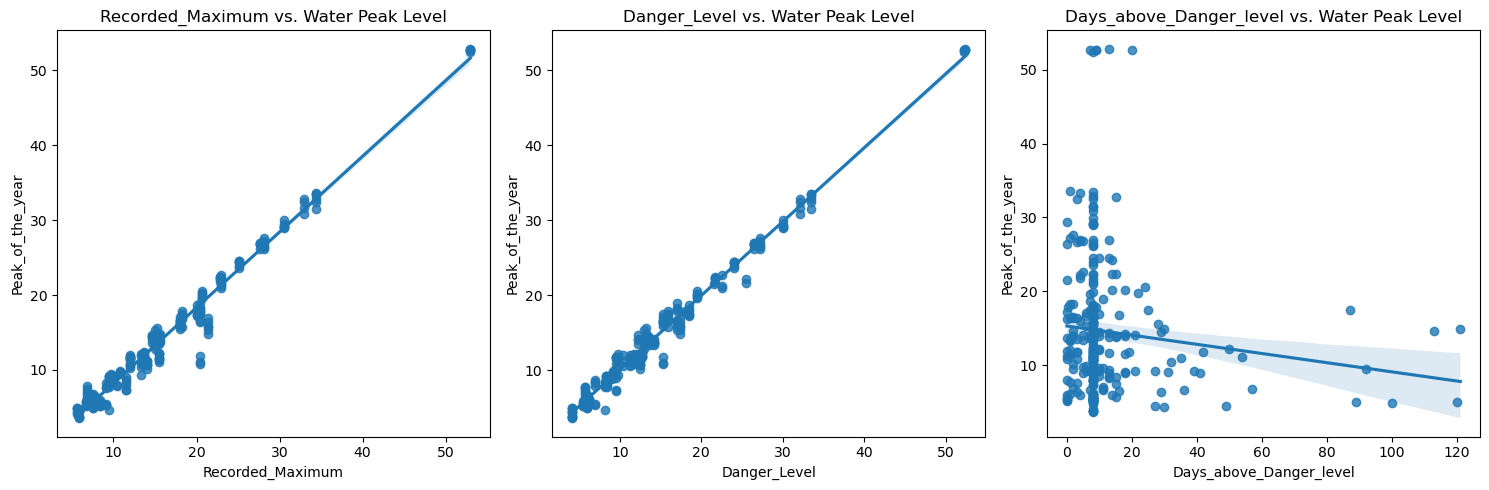

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Recorded_Maximum', 'Danger_Level', 'Days_above_Danger_level']

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

for i, feature in enumerate(features):
    sns.regplot(x=feature, y='Peak_of_the_year', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Water Peak Level')

plt.tight_layout()
plt.show()


#### Selecting priority based features and applying machine learning

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

features = ['Recorded_Maximum', 'Danger_Level', 'Days_above_Danger_level', 'River', 'Station', 'Basin', 'Year']
target = 'Peak_of_the_year'

priority_weights = {'Recorded_Maximum': 3, 'Danger_Level': 3, 'Days_above_Danger_level': 2, 'River': 1, 'Station': 1, 'Basin': 1, 'Year': 1}

sample_weights = df[features].apply(lambda x: sum([priority_weights[feature] for feature in features]), axis=1)

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    df[features], df[target], sample_weights, test_size=0.2, random_state=42
)

model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = Lasso(alpha=0.1, random_state=42)  
model3 = Ridge(alpha=0.1, random_state=42) 
model4 = LinearRegression()

models = {'Random Forest': model1, 'Lasso': model2, 'Ridge': model3, 'Linear Regression': model4}

for model_name, model in models.items():
    model.fit(X_train, y_train, sample_weight=weights_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"{model_name} - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")

Random Forest - MSE: 0.4743593332727298, RMSE: 0.6887374922804259, MAE: 0.49536545454545644, R-squared: 0.9942474823618299
Lasso - MSE: 1.374711779683391, RMSE: 1.172481035958958, MAE: 0.85876860560091, R-squared: 0.9833289803629053
Ridge - MSE: 1.3819978460345783, RMSE: 1.175584044649543, MAE: 0.8589160611849587, R-squared: 0.9832406228198821
Linear Regression - MSE: 1.3819900113417327, RMSE: 1.1755807123892994, MAE: 0.8589094930761458, R-squared: 0.9832407178305747


### Flood Occurrence 

In [34]:
import pandas as pd


df['Flood_Possibility'] = 0 

mask = df['Danger_Level'] <= df['Peak_of_the_year']
df.loc[mask, 'Flood_Possibility'] = 1

In [35]:
df

,Year,River,Station,Basin,Recorded_Maximum,Danger_Level,Peak_of_the_year,Days_above_Danger_level,River_Station,Flood_Possibility
0,2010,3,28,0,27.66,26.50,26.83,4.0,4,1
1,2010,26,10,0,52.97,52.25,52.65,9.0,49,1
2,2010,26,27,0,30.52,30.00,29.44,0.0,51,0
3,2010,1,40,0,28.10,27.25,26.36,0.0,2,0
4,2010,1,7,0,25.06,24.00,24.28,14.0,1,1
...,...,...,...,...,...,...,...,...,...,...
268,2015,24,4,4,20.38,15.25,17.45,7.0,43,1
269,2015,24,13,4,9.05,7.00,8.30,13.0,44,1
270,2015,19,29,4,15.45,12.25,14.11,7.0,36,1
271,2015,19,8,4,6.83,5.75,7.40,15.0,35,1


In [36]:
df_pearsoncor = df.corr()
display(df_pearsoncor)

,Year,River,Station,Basin,Recorded_Maximum,Danger_Level,Peak_of_the_year,Days_above_Danger_level,River_Station,Flood_Possibility
Year,1.000000,-0.012605,-0.034432,0.022687,0.015491,0.022046,0.013803,-0.076187,-0.012999,-0.076629
River,-0.012605,1.000000,-0.002188,0.160155,-0.058433,-0.067670,-0.054902,0.072659,0.997231,0.054870
Station,-0.034432,-0.002188,1.000000,0.103110,-0.163912,-0.157108,-0.171076,-0.004547,0.014562,-0.121892
Basin,0.022687,0.160155,0.103110,1.000000,-0.228392,-0.291533,-0.267660,-0.002675,0.141216,0.142527
Recorded_Maximum,0.015491,-0.058433,-0.163912,-0.228392,1.000000,0.992904,0.988021,-0.152109,-0.051935,0.031681
Danger_Level,0.022046,-0.067670,-0.157108,-0.291533,0.992904,1.000000,0.992632,-0.145366,-0.060441,0.019031
Peak_of_the_year,0.013803,-0.054902,-0.171076,-0.267660,0.988021,0.992632,1.000000,-0.116989,-0.048569,0.111078
Days_above_Danger_level,-0.076187,0.072659,-0.004547,-0.002675,-0.152109,-0.145366,-0.116989,1.000000,0.056024,0.263359
River_Station,-0.012999,0.997231,0.014562,0.141216,-0.051935,-0.060441,-0.048569,0.056024,1.000000,0.046461
Flood_Possibility,-0.076629,0.054870,-0.121892,0.142527,0.031681,0.019031,0.111078,0.263359,0.046461,1.000000


In [37]:
df_spearmancor = df.corr(method = 'spearman')
df_spearmancor=df_spearmancor.abs()
display(df_spearmancor)

,Year,River,Station,Basin,Recorded_Maximum,Danger_Level,Peak_of_the_year,Days_above_Danger_level,River_Station,Flood_Possibility
Year,1.000000,0.012020,0.033379,0.005513,0.013295,0.023778,0.009704,0.109268,0.012082,0.076660
River,0.012020,1.000000,0.010809,0.145055,0.181886,0.203882,0.179803,0.062067,0.999194,0.048945
Station,0.033379,0.010809,1.000000,0.113530,0.075089,0.067017,0.081962,0.047585,0.010769,0.125957
Basin,0.005513,0.145055,0.113530,1.000000,0.152886,0.204008,0.161737,0.040192,0.144938,0.154749
Recorded_Maximum,0.013295,0.181886,0.075089,0.152886,1.000000,0.983589,0.969863,0.149752,0.185099,0.005237
Danger_Level,0.023778,0.203882,0.067017,0.204008,0.983589,1.000000,0.978051,0.124913,0.207577,0.013560
Peak_of_the_year,0.009704,0.179803,0.081962,0.161737,0.969863,0.978051,1.000000,0.106173,0.184386,0.122939
Days_above_Danger_level,0.109268,0.062067,0.047585,0.040192,0.149752,0.124913,0.106173,1.000000,0.059920,0.201278
River_Station,0.012082,0.999194,0.010769,0.144938,0.185099,0.207577,0.184386,0.059920,1.000000,0.043856
Flood_Possibility,0.076660,0.048945,0.125957,0.154749,0.005237,0.013560,0.122939,0.201278,0.043856,1.000000


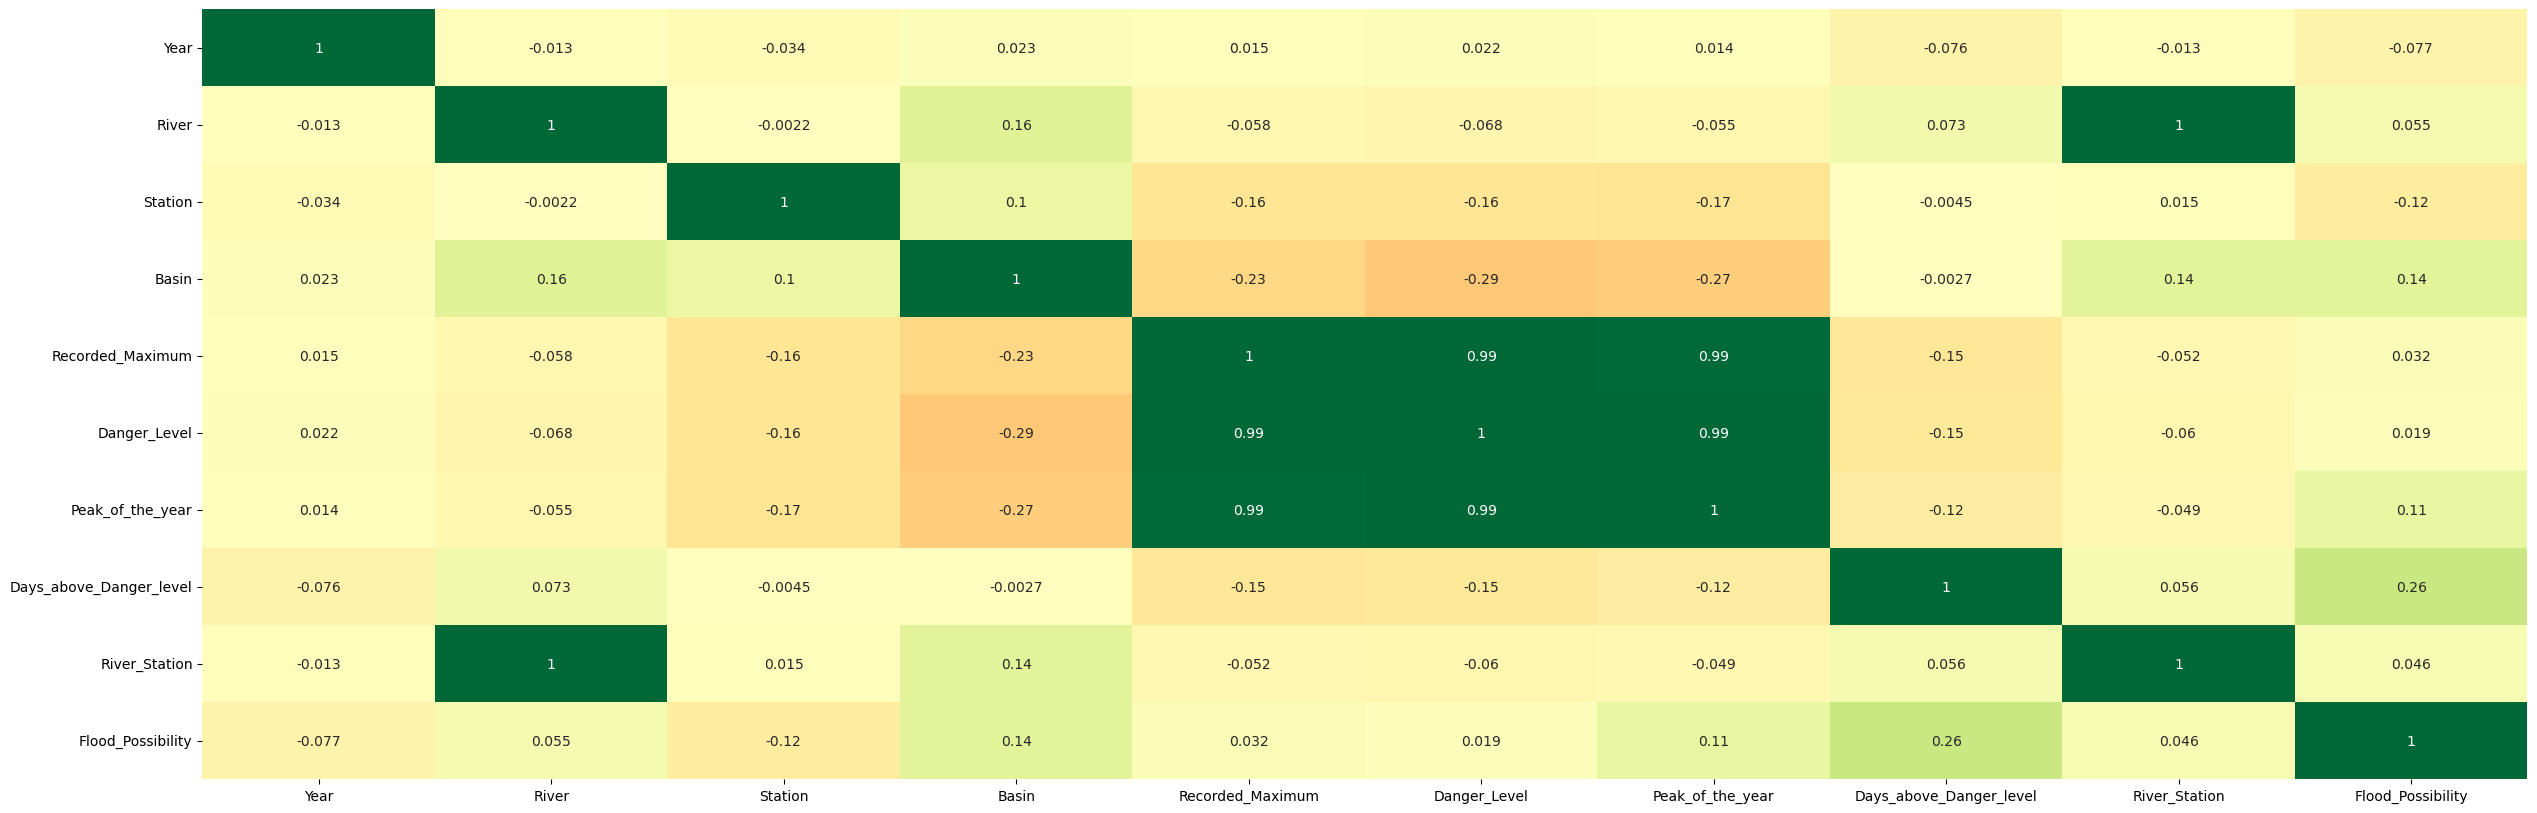

In [38]:
plt.figure(figsize=(30,10))
sns.heatmap(df_pearsoncor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1, cbar=False)
plt.show()

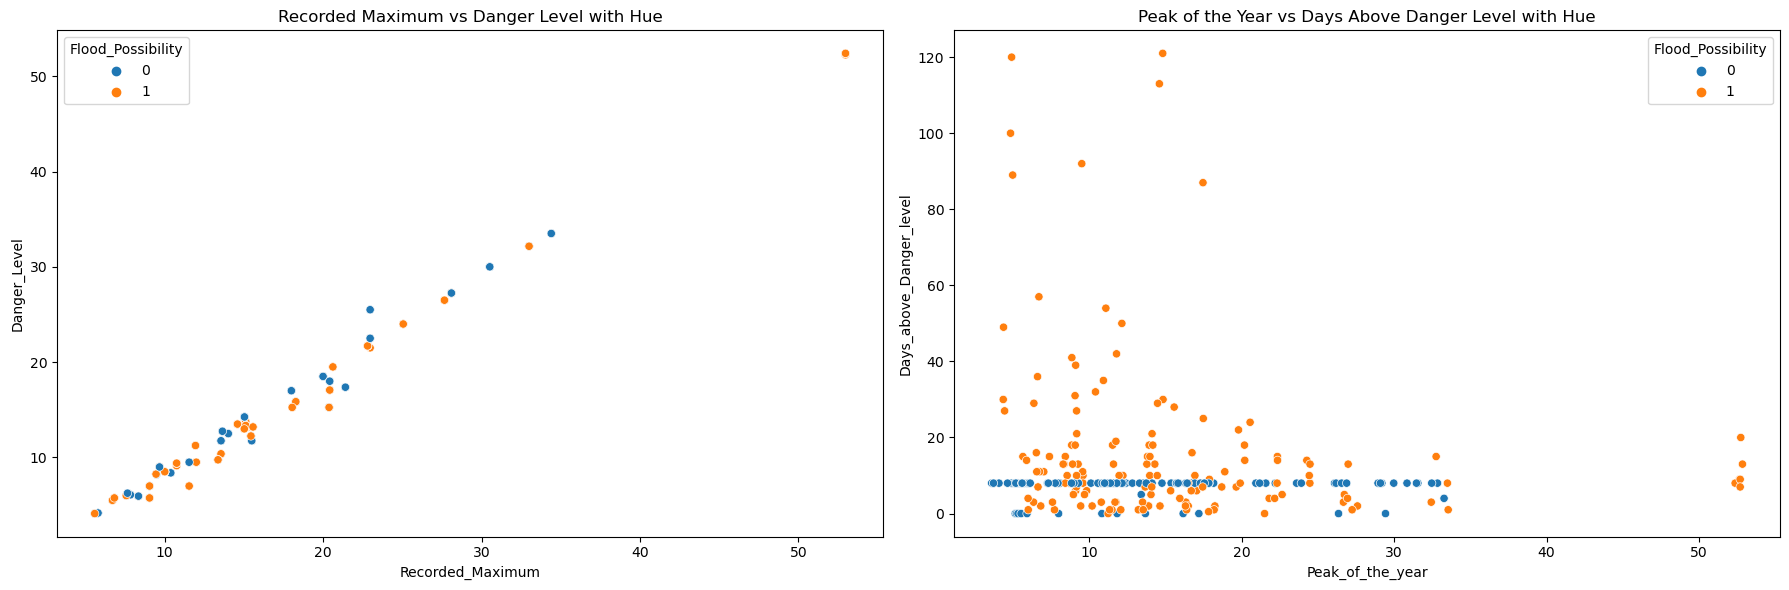

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.scatterplot(x='Recorded_Maximum', y='Danger_Level', hue='Flood_Possibility', data=df, ax=axes[0])
axes[0].set_title('Recorded Maximum vs Danger Level with Hue')

sns.scatterplot(x='Peak_of_the_year', y='Days_above_Danger_level', hue='Flood_Possibility', data=df, ax=axes[1])
axes[1].set_title('Peak of the Year vs Days Above Danger Level with Hue')

plt.tight_layout()
plt.show()


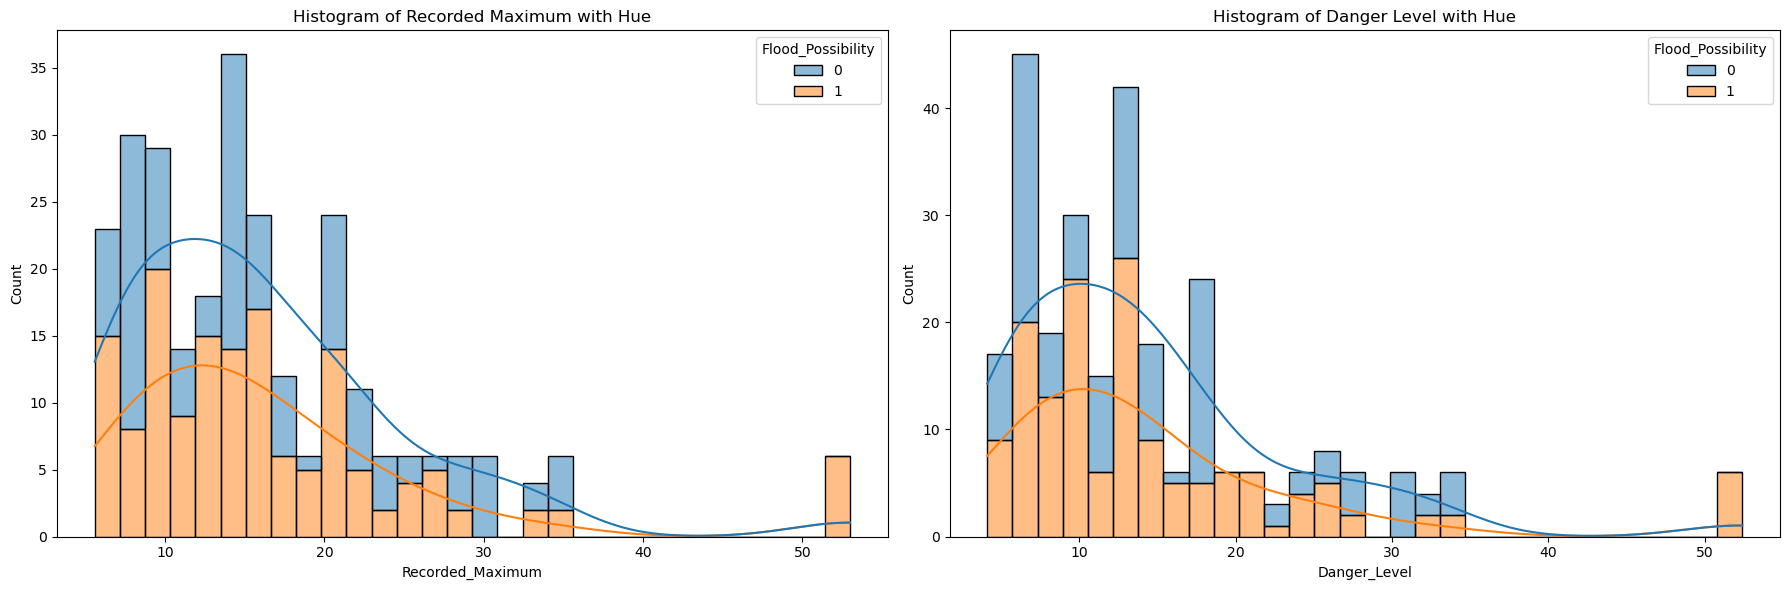

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.histplot(data=df, x='Recorded_Maximum', hue='Flood_Possibility', multiple="stack", bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Recorded Maximum with Hue')


sns.histplot(data=df, x='Danger_Level', hue='Flood_Possibility', multiple="stack", bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Danger Level with Hue')

plt.tight_layout()
plt.show()


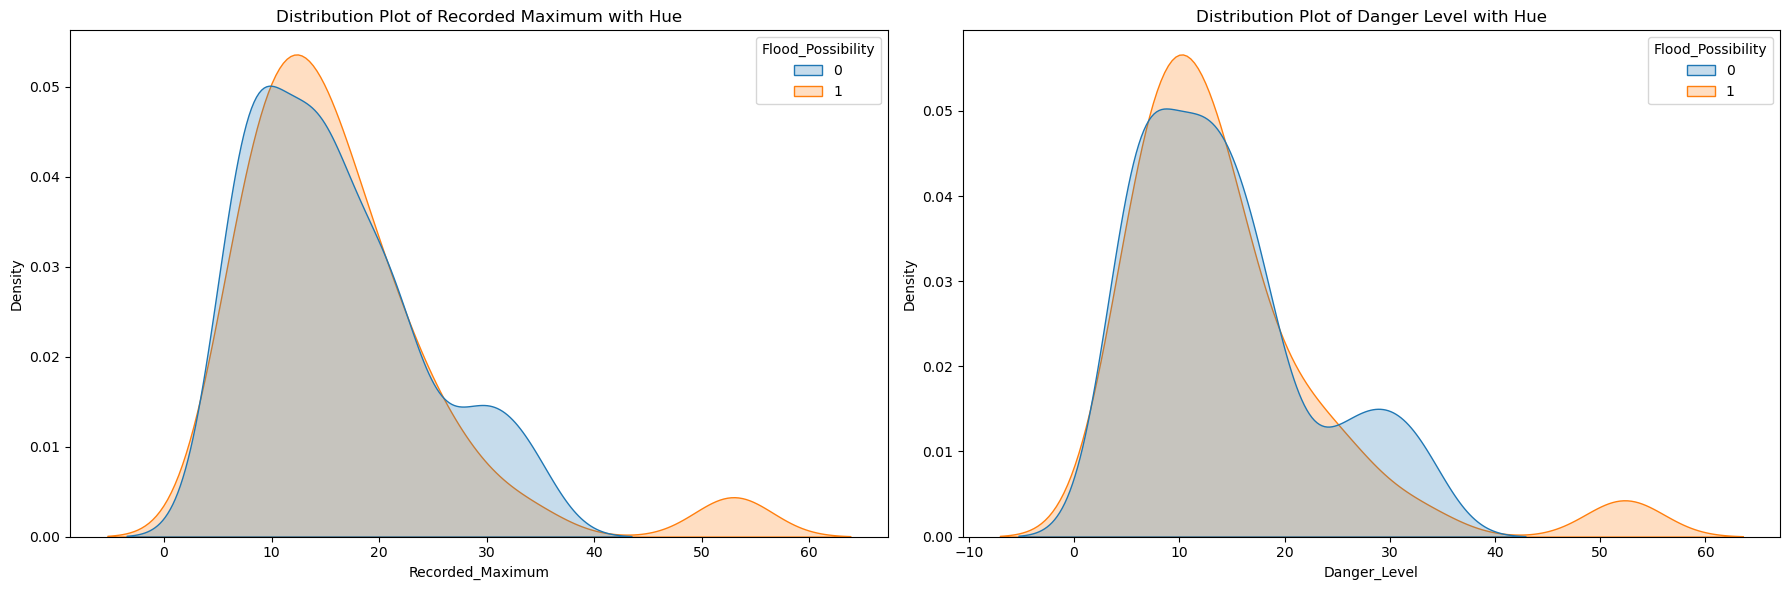

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.kdeplot(data=df, x='Recorded_Maximum', hue='Flood_Possibility', fill=True, common_norm=False, ax=axes[0])
axes[0].set_title('Distribution Plot of Recorded Maximum with Hue')

sns.kdeplot(data=df, x='Danger_Level', hue='Flood_Possibility', fill=True, common_norm=False, ax=axes[1])
axes[1].set_title('Distribution Plot of Danger Level with Hue')

plt.tight_layout()
plt.show()

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

features = ['Days_above_Danger_level', 'Peak_of_the_year', 'Recorded_Maximum', 'Danger_Level', 'River', 'Station', 'Basin', 'Year']
target = 'Flood_Possibility'

priority_weights = {'Days_above_Danger_level': 3, 'Peak_of_the_year': 3, 'Recorded_Maximum': 1, 'Danger_Level': 1, 'River': 1, 'Station': 1, 'Basin': 1, 'Year': 1}

sample_weights = df[features].apply(lambda x: sum([priority_weights[feature] for feature in features]), axis=1)

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    df[features], df[target], sample_weights, test_size=0.2, random_state=42
)


model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = LogisticRegression(random_state=42)
model3 = DecisionTreeClassifier(random_state=42)

models = {'Random Forest': model1, 'Logistic Regression': model2, 'Decision Tree': model3}

for model_name, model in models.items():
    model.fit(X_train, y_train, sample_weight=weights_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    classification_report_str = classification_report(y_test, predictions)

    print(f"{model_name} - Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report_str)


Random Forest - Accuracy: 0.9454545454545454
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.97      0.94      0.95        32

    accuracy                           0.95        55
   macro avg       0.94      0.95      0.94        55
weighted avg       0.95      0.95      0.95        55

Logistic Regression - Accuracy: 0.8545454545454545
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.88      0.88      0.88        32

    accuracy                           0.85        55
   macro avg       0.85      0.85      0.85        55
weighted avg       0.85      0.85      0.85        55

Decision Tree - Accuracy: 0.9454545454545454
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        23
           1       0.91    